In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.4.1


In [2]:

f_x170 = open('170_triple/VCS_fields_TT_x_ROM.txt', 'r')
x170 = np.loadtxt(f_x170)
x170 = x170[::100,:]
print(x170.shape)
f_y170 = open('170_triple/VCS_fields_TT_y_ROM.txt', 'r')
y170 = np.loadtxt(f_y170)
y170 = y170[::100,:]
print(y170.shape)

#x30 = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [7, 8, 9, 10], [3, 4, 5, 6], [1, 2, 3, 4]])

#x28 = np.array([])

#print(x30[0:5,:])

(1000, 39)
(1000, 41)


In [3]:
dim_x = int(x170.shape[1])
dim_y = int(y170.shape[1])
print(dim_x)
print(dim_y)

x170_sample_grid_tmp = np.delete(x170, (x170.shape[0]-1), axis=0)
x170_train_values = np.delete(x170, (0), axis=0)
x170_sample_grid = 170*np.ones((x170_sample_grid_tmp.shape[0],x170_sample_grid_tmp.shape[1]+1))
x170_sample_grid[:,:-1] = x170_sample_grid_tmp
#x170_sample_grid_plus1 = x170_sample_grid
#x170_sample_grid_plus1[:,:-1] = x170_sample_grid_plus1[:,:-1] + np.ones((x170_sample_grid_tmp.shape[0],x170_sample_grid_tmp.shape[1]))
#x170_sample_grid_minus1 = x170_sample_grid
#x170_sample_grid_minus1[:,:-1] = x170_sample_grid_minus1[:,:-1] - np.ones((x170_sample_grid_tmp.shape[0],x170_sample_grid_tmp.shape[1]))

#sample_data = np.r_[x170_sample_grid_plus1, x170_sample_grid_minus1]
sample_data = x170_sample_grid

print(sample_data.shape)

#train_data = np.r_[x170_train_values, x170_train_values]
train_data = x170_train_values

print(train_data.shape)

print(sample_data[0:1,:])

#f_sample_grid_d1 = open('sample_grid_d1.txt', 'r')
#sample_grid_d1 = 2*(np.loadtxt(f_sample_grid_d1) - 0.5)
#sample_grid_d1 = np.loadtxt(f_sample_grid_d1)
#print(sample_grid_d1)
#f_sample_grid_d2 = open('sample_grid_d2.txt', 'r')
#sample_grid_d2 = 10*(np.loadtxt(f_sample_grid_d2) - 0.1)
#sample_grid_d2 = np.loadtxt(f_sample_grid_d2)
#print(sample_grid_d2)

39
41
(999, 40)
(999, 39)
[[ 9.99149282e+01  1.44369438e+01  2.53894598e+01 -8.47102786e+02
  -2.16405972e+02 -2.07607307e+02 -2.87739276e+02  1.22006132e+02
   4.67710221e+01 -3.59908598e+00 -5.86913619e+02  9.39117225e+01
   1.49488180e+01  8.48742597e+01  3.71241402e+02  2.04813149e+02
  -3.52510693e+02 -5.13883339e+01  4.72753478e+02  3.66307131e+02
  -2.56357084e+04 -2.93883538e+02  1.09602743e+02 -7.61808896e+02
   6.33012022e+01  8.46394481e+00 -4.10678886e+02  1.31076502e+01
  -6.00958560e+01  4.27390480e+02 -2.39982703e+02 -3.10779323e+02
   1.26673161e+02  4.84342782e+02 -8.05468788e+02  6.80231660e+02
  -1.28278458e+02  1.22980784e+02 -5.84406182e+01  1.70000000e+02]]


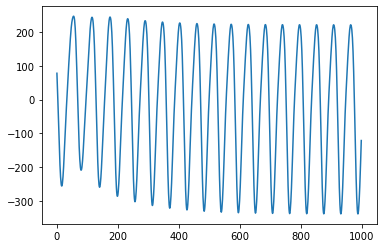

In [4]:
#train_values = samples_optimal_clustering.reshape(110)
#train_values = np.concatenate((lcs0, lcs1, lcs2, lcs3, lcs4, lcs5, lcs6, lcs7))
#print(train_values)
#train_values = np.reshape(train_values,(lcs0.shape[0],8), order='F')
#print(train_values.shape)
#train_values = 1./train_values
#np.argmax(train_values, axis = 1)
#for i in range(0,train_values.shape[0]):
#    sum_row = np.sum(train_values[i,:])
#    train_values[i,:] = train_values[i,:] / sum_row
    #print(sum_row)
#print(train_values)
#train_values = np.transpose(trainANN)
#print(trainANN)
#print(train_values.shape)
#print(train_values.shape[1])
fig, ax = plt.subplots()  # Create a figure containing a single axes.
#ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.
ax.plot(train_data[:999,0])
ax.plot(train_data[1000:1999,0])

In [5]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=[sample_data.shape[1]]),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(train_data.shape[1])
])


In [6]:
es = EarlyStopping(monitor='mse', min_delta = 0, patience = 100, mode='min',verbose=1, restore_best_weights = 1)

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])
model.fit(sample_data, train_data, epochs=500, callbacks=[es])

es = EarlyStopping(monitor='mse', min_delta = 0, patience = 100, mode='min',verbose=1, restore_best_weights = 1)

model.compile(optimizer='adadelta',
              loss='mse',
              metrics=['mae', 'mse'])
model.fit(sample_data, train_data, epochs=200, callbacks=[es])


Epoch 1/500
32/32 [==============================] - 2s 23ms/step - loss: 6508004.0455 - mae: 914.9505 - mse: 6508004.0455
Epoch 2/500
32/32 [==============================] - 1s 29ms/step - loss: 189637.4697 - mae: 340.3620 - mse: 189637.4697
Epoch 3/500
32/32 [==============================] - 1s 26ms/step - loss: 52511.8678 - mae: 177.3473 - mse: 52511.8678
Epoch 4/500
32/32 [==============================] - 1s 25ms/step - loss: 9463.0797 - mae: 73.5266 - mse: 9463.0797
Epoch 5/500
32/32 [==============================] - 1s 25ms/step - loss: 6603.6082 - mae: 59.7646 - mse: 6603.6082
Epoch 6/500
32/32 [==============================] - 1s 24ms/step - loss: 6217.2079 - mae: 55.9497 - mse: 6217.2079
Epoch 7/500
32/32 [==============================] - 1s 22ms/step - loss: 5020.1271 - mae: 50.0878 - mse: 5020.1271
Epoch 8/500
32/32 [==============================] - 1s 26ms/step - loss: 4193.8013 - mae: 45.6348 - mse: 4193.8013
Epoch 9/500
32/32 [==============================] - 1s 2

32/32 [==============================] - 1s 25ms/step - loss: 398.7381 - mae: 14.9401 - mse: 398.7381
Epoch 72/500
32/32 [==============================] - 1s 30ms/step - loss: 604.2235 - mae: 16.3470 - mse: 604.2235
Epoch 73/500
32/32 [==============================] - 1s 30ms/step - loss: 1299.7905 - mae: 19.8039 - mse: 1299.7905
Epoch 74/500
32/32 [==============================] - 1s 26ms/step - loss: 399.2824 - mae: 13.8371 - mse: 399.2824
Epoch 75/500
32/32 [==============================] - 1s 26ms/step - loss: 3170.4696 - mae: 22.4830 - mse: 3170.4696
Epoch 76/500
32/32 [==============================] - 1s 26ms/step - loss: 2953.6569 - mae: 26.2998 - mse: 2953.6569
Epoch 77/500
32/32 [==============================] - 1s 25ms/step - loss: 5203.8941 - mae: 30.7326 - mse: 5203.8941
Epoch 78/500
32/32 [==============================] - 1s 28ms/step - loss: 4406.4343 - mae: 42.6000 - mse: 4406.4343
Epoch 79/500
32/32 [==============================] - 1s 25ms/step - loss: 2517.732

32/32 [==============================] - 1s 34ms/step - loss: 2561.1678 - mae: 24.3387 - mse: 2561.1678
Epoch 142/500
32/32 [==============================] - 1s 25ms/step - loss: 569.3290 - mae: 17.9544 - mse: 569.3290
Epoch 143/500
32/32 [==============================] - 1s 32ms/step - loss: 502.6662 - mae: 17.2450 - mse: 502.6662
Epoch 144/500
32/32 [==============================] - 1s 26ms/step - loss: 397.6132 - mae: 15.2335 - mse: 397.6132
Epoch 145/500
32/32 [==============================] - 1s 31ms/step - loss: 585.4230 - mae: 17.3340 - mse: 585.4230
Epoch 146/500
32/32 [==============================] - 1s 26ms/step - loss: 1524.0807 - mae: 22.2245 - mse: 1524.0807
Epoch 147/500
32/32 [==============================] - 1s 28ms/step - loss: 3853.4427 - mae: 35.0170 - mse: 3853.4427
Epoch 148/500
32/32 [==============================] - 1s 34ms/step - loss: 12370.2379 - mae: 73.0909 - mse: 12370.2379
Epoch 149/500
32/32 [==============================] - 1s 31ms/step - loss: 

32/32 [==============================] - 2s 48ms/step - loss: 877.0717 - mae: 21.7011 - mse: 877.0717
Epoch 212/500
32/32 [==============================] - 1s 45ms/step - loss: 1660.7764 - mae: 32.0895 - mse: 1660.7764
Epoch 213/500
32/32 [==============================] - 1s 44ms/step - loss: 642.2732 - mae: 18.0114 - mse: 642.2732
Epoch 214/500
32/32 [==============================] - 1s 39ms/step - loss: 546.1349 - mae: 15.4166 - mse: 546.1349
Epoch 215/500
32/32 [==============================] - 1s 37ms/step - loss: 938.2466 - mae: 18.4192 - mse: 938.2466
Epoch 216/500
32/32 [==============================] - 1s 37ms/step - loss: 5002.4688 - mae: 34.9352 - mse: 5002.4688
Epoch 217/500
32/32 [==============================] - 1s 37ms/step - loss: 3458.0604 - mae: 32.1222 - mse: 3458.0604
Epoch 218/500
32/32 [==============================] - 1s 37ms/step - loss: 2639.0307 - mae: 27.2378 - mse: 2639.0307
Epoch 219/500
32/32 [==============================] - 1s 38ms/step - loss: 48

32/32 [==============================] - 1s 28ms/step - loss: 174.9998 - mae: 10.3069 - mse: 174.9998
Epoch 282/500
32/32 [==============================] - 1s 43ms/step - loss: 136.8186 - mae: 9.1666 - mse: 136.8186
Epoch 283/500
32/32 [==============================] - 1s 30ms/step - loss: 140.4922 - mae: 9.1113 - mse: 140.4922
Epoch 284/500
32/32 [==============================] - 1s 32ms/step - loss: 274.3165 - mae: 11.5260 - mse: 274.3165
Epoch 285/500
32/32 [==============================] - 1s 26ms/step - loss: 951.0084 - mae: 16.1777 - mse: 951.0084
Epoch 286/500
32/32 [==============================] - 1s 33ms/step - loss: 838.7323 - mae: 15.2846 - mse: 838.7323
Epoch 287/500
23/32 [====================>.........] - ETA: 0s - loss: 1928.4506 - mae: 21.1813 - mse: 1928.4506

KeyboardInterrupt: 

In [7]:
#model.fit(x30_sample_grid, x30_train_values, epochs=10000, callbacks=[es])
# use the ROM to time-step given the first reduced coordinate representation
current_estimate = x170_sample_grid[0,:]
estimated_trajectory = 0*x170_sample_grid
estimated_trajectory[0,:] = current_estimate
#print(current_estimate)
#print(x30_sample_grid.shape)
#print(x30_sample_grid[0:1,:])
for i in range(0,x170_sample_grid.shape[0]-1):
    print(estimated_trajectory[i:i+1,:])
    next_estimate = model.predict(estimated_trajectory[i:i+1,:])
    print(next_estimate)
    estimated_trajectory[i+1,:-1] = next_estimate
#    estimated_trajectory[i+1,:-1] = x130_train_values[i-1,:]
    estimated_trajectory[i+1,-1] = 170
#    print(i)

[[ 9.99149282e+01  1.44369438e+01  2.53894598e+01 -8.47102786e+02
  -2.16405972e+02 -2.07607307e+02 -2.87739276e+02  1.22006132e+02
   4.67710221e+01 -3.59908598e+00 -5.86913619e+02  9.39117225e+01
   1.49488180e+01  8.48742597e+01  3.71241402e+02  2.04813149e+02
  -3.52510693e+02 -5.13883339e+01  4.72753478e+02  3.66307131e+02
  -2.56357084e+04 -2.93883538e+02  1.09602743e+02 -7.61808896e+02
   6.33012022e+01  8.46394481e+00 -4.10678886e+02  1.31076502e+01
  -6.00958560e+01  4.27390480e+02 -2.39982703e+02 -3.10779323e+02
   1.26673161e+02  4.84342782e+02 -8.05468788e+02  6.80231660e+02
  -1.28278458e+02  1.22980784e+02 -5.84406182e+01  1.70000000e+02]]
[[ 9.3233032e+01  1.7453272e+01 -2.8668007e+01 -8.8202087e+02
  -1.5410168e+02 -1.9774483e+02 -2.7249036e+02  2.2267760e+02
   8.5760948e+01  5.4691458e+00 -5.6388336e+02  7.7613747e+01
  -3.8720142e+01  7.4001411e+01  3.8856641e+02  1.8071494e+02
  -3.7204013e+02 -1.4547841e+02  4.4531119e+02  3.1370255e+02
  -2.5798811e+04 -2.4793004e

[[-7.79982300e+01  4.43357201e+01 -1.90556686e+02 -5.99698547e+02
  -9.78651047e+01  6.77994766e+01 -6.69655685e+01  3.35492249e+02
   2.98192047e+02  6.90443726e+01 -1.17623100e+02  9.80361710e+01
  -3.59842957e+02  1.95536575e+01  2.48659286e+02  3.00824928e+01
  -3.98605865e+02 -4.27585022e+02  3.01184998e+02  1.01678474e+02
  -2.70442402e+04  1.61313553e+02  3.11784943e+02 -2.53673798e+02
   6.15742531e+01 -8.84925766e+01  2.97293976e+02  4.88475616e+02
   1.58487396e+02  3.70491791e+02 -5.27388184e+02 -1.65546768e+02
   2.63265381e+02  6.80771301e+02 -5.97205383e+02  3.61584686e+02
   4.67755737e+01  3.26419586e+02 -2.64676361e+02]]
[[-7.79982300e+01  4.43357201e+01 -1.90556686e+02 -5.99698547e+02
  -9.78651047e+01  6.77994766e+01 -6.69655685e+01  3.35492249e+02
   2.98192047e+02  6.90443726e+01 -1.17623100e+02  9.80361710e+01
  -3.59842957e+02  1.95536575e+01  2.48659286e+02  3.00824928e+01
  -3.98605865e+02 -4.27585022e+02  3.01184998e+02  1.01678474e+02
  -2.70442402e+04  1.613

[[-2.08704895e+02  3.40433311e+01 -1.85702438e+02  3.02936615e+02
   3.52787912e-01  3.36763336e+02  1.77597351e+02  7.99531784e+01
   3.97829803e+02  2.69035625e+01  3.51279297e+02 -1.03790541e+01
  -4.96405701e+02 -8.36893234e+01  7.69318771e+01 -1.70598419e+02
  -1.25587982e+02 -5.25852966e+02 -3.27970276e+01 -2.09207291e+02
  -2.89067012e+04  6.06257935e+02  1.79890656e+02  4.04337433e+02
   1.41910675e+02 -1.49590714e+02  7.47346375e+02  6.76076172e+02
   1.82044891e+02  4.83972397e+01 -4.12342285e+02  2.04707321e+02
   1.84773254e+02  4.38104156e+02 -1.15254196e+02 -1.68438995e+02
   3.19662903e+02  3.69057159e+02 -3.91855377e+02]]
[[-2.08704895e+02  3.40433311e+01 -1.85702438e+02  3.02936615e+02
   3.52787912e-01  3.36763336e+02  1.77597351e+02  7.99531784e+01
   3.97829803e+02  2.69035625e+01  3.51279297e+02 -1.03790541e+01
  -4.96405701e+02 -8.36893234e+01  7.69318771e+01 -1.70598419e+02
  -1.25587982e+02 -5.25852966e+02 -3.27970276e+01 -2.09207291e+02
  -2.89067012e+04  6.062

[[-1.4686832e+02  4.8336147e+01 -2.1917094e+02  9.6200787e+02
   2.7191174e+02  4.2958914e+02  3.7688019e+02 -2.1356544e+02
   2.5441830e+02 -4.2522141e+01  6.5434546e+02 -1.1560885e+02
  -3.7404730e+02 -1.0581481e+02 -1.5573985e+01 -1.8320303e+02
   1.9321451e+02 -2.1366377e+02 -4.0601437e+02 -5.1486688e+02
  -3.1172613e+04  5.7139722e+02  2.3270300e+01  7.8970483e+02
   1.2684720e+02 -8.5335228e+01  6.2458148e+02  3.2082785e+02
   1.9922813e+01 -2.7014468e+02  6.8045540e+00  4.4132449e+02
  -1.5962897e+02 -8.9901413e+01  6.7900995e+02 -5.9537738e+02
   3.9007166e+02  2.7958365e+02 -2.5896719e+02]]
[[-1.46868317e+02  4.83361473e+01 -2.19170944e+02  9.62007874e+02
   2.71911743e+02  4.29589142e+02  3.76880188e+02 -2.13565445e+02
   2.54418304e+02 -4.25221405e+01  6.54345459e+02 -1.15608849e+02
  -3.74047302e+02 -1.05814812e+02 -1.55739851e+01 -1.83203033e+02
   1.93214508e+02 -2.13663773e+02 -4.06014374e+02 -5.14866882e+02
  -3.11726133e+04  5.71397217e+02  2.32702999e+01  7.89704834e+

[[ 1.10004311e+01  9.48069992e+01 -1.90454636e+02  1.21162866e+03
   6.66910767e+02  2.35022507e+02  4.68604187e+02 -1.58337631e+02
  -3.68168678e+01  7.75429764e+01  6.95676697e+02 -6.68709850e+00
  -1.62448006e+01 -1.10184135e+02 -2.86007812e+02 -1.42267609e+02
   4.29342804e+02  4.34084900e+02 -6.07474731e+02 -6.60454895e+02
  -3.26840449e+04  2.39349289e+02 -1.86027069e+02  8.28415894e+02
   1.05017365e+02  6.77173843e+01  9.17748108e+01 -3.91286896e+02
  -1.11528114e+02 -5.67319397e+02  5.14171570e+02  4.80674347e+02
  -4.39317017e+02 -8.39327087e+02  1.50789685e+03 -8.42767700e+02
   2.46340820e+02  2.00992889e+01  9.80816650e+01]]
[[ 1.10004311e+01  9.48069992e+01 -1.90454636e+02  1.21162866e+03
   6.66910767e+02  2.35022507e+02  4.68604187e+02 -1.58337631e+02
  -3.68168678e+01  7.75429764e+01  6.95676697e+02 -6.68709850e+00
  -1.62448006e+01 -1.10184135e+02 -2.86007812e+02 -1.42267609e+02
   4.29342804e+02  4.34084900e+02 -6.07474731e+02 -6.60454895e+02
  -3.26840449e+04  2.393

[[ 1.83574554e+02  4.64553795e+01  2.95346649e+02  5.18601440e+02
   7.72518555e+02 -2.10648575e+02  1.31436340e+02  1.90187057e+02
  -3.28166412e+02  3.19854950e+02  9.61528397e+01  1.32301361e+02
   3.65119934e+02 -1.20792046e+02 -2.92550781e+02  6.17074928e+01
   4.32493683e+02  9.70498413e+02 -4.59548401e+02 -3.97206390e+02
  -3.29443281e+04 -8.70221634e+01 -6.56694153e+02  2.24844391e+02
   1.32959869e+02  3.25297882e+02 -9.81761658e+02 -1.03410742e+03
  -1.32971710e+02 -5.08743378e+02  7.54825928e+02 -1.71475449e+01
  -5.53768799e+02 -1.20256665e+03  1.31824133e+03 -4.26276276e+02
  -5.23202515e+01 -4.20232697e+02  5.59791382e+02]]
[[ 1.83574554e+02  4.64553795e+01  2.95346649e+02  5.18601440e+02
   7.72518555e+02 -2.10648575e+02  1.31436340e+02  1.90187057e+02
  -3.28166412e+02  3.19854950e+02  9.61528397e+01  1.32301361e+02
   3.65119934e+02 -1.20792046e+02 -2.92550781e+02  6.17074928e+01
   4.32493683e+02  9.70498413e+02 -4.59548401e+02 -3.97206390e+02
  -3.29443281e+04 -8.702

[[   273.84235      56.12823     635.03436    -345.446       519.6611
    -426.48563    -234.14288     275.86047    -371.63644     263.96265
    -525.7354      186.66653     449.01373     -71.899956     63.60277
     304.0806      122.949005    821.3429     -106.28113      32.915154
  -32463.873      -381.58435    -860.31866    -532.0325      274.1962
     411.57138   -1572.6407    -1090.2057     -209.6813      -95.30961
     563.8929     -409.22397    -522.20404    -624.2049      178.01009
     361.69553    -192.90887    -498.63522     570.87823 ]]
[[   273.84234619     56.12823105    635.03436279   -345.4460144
     519.66107178   -426.48562622   -234.1428833     275.86047363
    -371.63644409    263.96264648   -525.7354126     186.66653442
     449.01373291    -71.89995575     63.60277176    304.08059692
     122.94900513    821.34289551   -106.28112793     32.9151535
  -32463.87304688   -381.58435059   -860.31866455   -532.0324707
     274.19619751    411.57138062  -1572.64074707  

[[   288.47513     110.73849     448.5554     -889.4737      308.3454
    -436.46182    -385.65332     252.37444    -202.55191     194.77745
    -916.41016     205.77792     303.39435     -34.376335    364.94666
     396.62766    -262.21506     436.37347     239.13144     295.03616
  -32081.236      -451.6911     -576.51605    -997.13257     343.47073
     331.197     -1508.5846     -731.26025    -232.8323      274.90927
     205.61394    -448.62204    -373.15958      92.239456   -643.91064
     848.96545    -178.06415    -156.75569     314.83337 ]]
[[   288.47512817    110.73848724    448.5553894    -889.47369385
     308.34539795   -436.46182251   -385.65332031    252.37443542
    -202.5519104     194.77745056   -916.41015625    205.77792358
     303.39434814    -34.37633514    364.94665527    396.62765503
    -262.21505737    436.37347412    239.13143921    295.03616333
  -32081.23632812   -451.69110107   -576.51605225   -997.13256836
     343.47073364    331.19699097  -1508.5845947

[[ 1.7419077e+02  1.1468255e+02  1.0265586e+01 -1.1138076e+03
   1.7540027e+02 -2.0728310e+02 -2.6514410e+02  3.9894739e+02
   1.3162051e+02  2.0668385e+02 -7.4131171e+02  2.6419162e+02
  -1.1903045e+02 -1.9879326e+01  4.7870142e+02  2.6966476e+02
  -4.8763254e+02 -5.4429878e+01  4.3529605e+02  2.4724532e+02
  -3.2687035e+04 -1.4085582e+02 -3.5176720e+01 -8.6350122e+02
   3.0938943e+02  1.6132677e+02 -7.7947382e+02 -7.9246459e+00
  -1.1510709e+02  4.7929758e+02 -3.0546991e+02 -3.6594193e+02
  -1.1130416e+02  6.5345209e+02 -8.0414294e+02  8.3767157e+02
  -7.5219055e+01  2.8325244e+02 -7.7350159e+01]]
[[ 1.74190765e+02  1.14682549e+02  1.02655859e+01 -1.11380762e+03
   1.75400269e+02 -2.07283096e+02 -2.65144104e+02  3.98947388e+02
   1.31620514e+02  2.06683853e+02 -7.41311707e+02  2.64191620e+02
  -1.19030449e+02 -1.98793259e+01  4.78701416e+02  2.69664764e+02
  -4.87632538e+02 -5.44298782e+01  4.35296051e+02  2.47245316e+02
  -3.26870352e+04 -1.40855820e+02 -3.51767197e+01 -8.63501221e+

[[-5.7772091e+01  8.6694817e+01 -1.7318828e+02 -5.4212360e+02
   1.5302667e+02  1.5384117e+02  1.2954900e+01  4.4825146e+02
   3.9349741e+02  1.9282201e+02 -6.9673393e+01  2.1879312e+02
  -5.0624481e+02 -5.9758842e+01  3.2931665e+02  3.9946995e+01
  -4.8755515e+02 -4.5760870e+02  2.1379111e+02 -5.2003563e+01
  -3.4582934e+04  3.8227652e+02  1.8606351e+02 -1.9416550e+02
   2.8008987e+02 -4.1255024e+01  1.5434976e+02  5.4282153e+02
   9.8976768e+01  3.9668466e+02 -5.8431708e+02 -1.0074929e+02
   1.0827552e+02  7.8412445e+02 -5.2227966e+02  3.6562387e+02
   1.6899139e+02  4.6429630e+02 -3.4000937e+02]]
[[-5.77720909e+01  8.66948166e+01 -1.73188278e+02 -5.42123596e+02
   1.53026672e+02  1.53841171e+02  1.29548998e+01  4.48251465e+02
   3.93497406e+02  1.92822006e+02 -6.96733932e+01  2.18793121e+02
  -5.06244812e+02 -5.97588425e+01  3.29316650e+02  3.99469948e+01
  -4.87555145e+02 -4.57608704e+02  2.13791107e+02 -5.20035629e+01
  -3.45829336e+04  3.82276520e+02  1.86063507e+02 -1.94165497e+

[[-1.50023682e+02  9.81480026e+01 -1.94169968e+02  5.77115234e+02
   3.47758667e+02  4.18536530e+02  3.51563171e+02  7.36162643e+01
   4.17942657e+02  1.18223160e+02  4.81540710e+02  5.36450539e+01
  -5.66090515e+02 -1.65636642e+02  1.45708481e+02 -1.49672760e+02
  -8.07641296e+01 -3.80933289e+02 -2.47217865e+02 -4.63847229e+02
  -3.71576016e+04  7.48692627e+02 -9.94844913e+00  5.66996338e+02
   3.02549103e+02 -7.16372910e+01  5.39066589e+02  5.67097229e+02
   7.97741318e+01 -3.02024307e+01 -2.75469727e+02  3.48710175e+02
  -1.09895195e+02  3.11326752e+02  3.13737152e+02 -3.20948212e+02
   4.15258423e+02  4.81952484e+02 -3.71839600e+02]]
[[-1.50023682e+02  9.81480026e+01 -1.94169968e+02  5.77115234e+02
   3.47758667e+02  4.18536530e+02  3.51563171e+02  7.36162643e+01
   4.17942657e+02  1.18223160e+02  4.81540710e+02  5.36450539e+01
  -5.66090515e+02 -1.65636642e+02  1.45708481e+02 -1.49672760e+02
  -8.07641296e+01 -3.80933289e+02 -2.47217865e+02 -4.63847229e+02
  -3.71576016e+04  7.486

[[-6.3764431e+01  1.1200674e+02 -2.0451054e+02  1.1705166e+03
   6.3463440e+02  4.3342343e+02  5.2317255e+02 -1.7945723e+02
   1.9407095e+02  6.5622025e+01  7.7124786e+02 -2.6929773e+01
  -3.3990692e+02 -1.5965080e+02 -5.0405773e+01 -1.5625418e+02
   2.8419632e+02  4.6929008e+01 -6.2457013e+02 -7.2960999e+02
  -3.9348273e+04  5.5833771e+02 -1.3818674e+02  8.9136523e+02
   2.3135257e+02  1.2046489e+01  3.5428299e+02  6.0100563e+01
  -3.7966835e+01 -4.2812881e+02  2.3453783e+02  5.4477161e+02
  -4.1984576e+02 -3.8847623e+02  1.1723517e+03 -7.8031757e+02
   4.0865631e+02  2.6831558e+02 -1.3924008e+02]]
[[-6.37644310e+01  1.12006737e+02 -2.04510544e+02  1.17051660e+03
   6.34634399e+02  4.33423431e+02  5.23172546e+02 -1.79457230e+02
   1.94070953e+02  6.56220245e+01  7.71247864e+02 -2.69297733e+01
  -3.39906921e+02 -1.59650803e+02 -5.04057732e+01 -1.56254181e+02
   2.84196320e+02  4.69290085e+01 -6.24570129e+02 -7.29609985e+02
  -3.93482734e+04  5.58337708e+02 -1.38186737e+02  8.91365234e+

[[ 1.34556305e+02  1.09114189e+02  7.72548447e+01  1.03257983e+03
   9.65300781e+02 -2.47365189e+00  3.87252380e+02  4.86780319e+01
  -2.24965912e+02  2.81734161e+02  4.70193848e+02  1.08767494e+02
   2.11569901e+02 -1.56674484e+02 -3.77496094e+02 -3.57160912e+01
   5.25697815e+02  9.12352173e+02 -6.73511108e+02 -6.61202393e+02
  -4.04249219e+04  1.09425041e+02 -5.66057068e+02  6.42346680e+02
   1.76401276e+02  2.60719452e+02 -6.24874573e+02 -9.07710449e+02
  -1.43486115e+02 -6.88931091e+02  7.94700623e+02  2.70442780e+02
  -6.45937622e+02 -1.29245398e+03  1.80240247e+03 -7.73593933e+02
   1.06952576e+02 -2.42114029e+02  4.24242737e+02]]
[[ 1.34556305e+02  1.09114189e+02  7.72548447e+01  1.03257983e+03
   9.65300781e+02 -2.47365189e+00  3.87252380e+02  4.86780319e+01
  -2.24965912e+02  2.81734161e+02  4.70193848e+02  1.08767494e+02
   2.11569901e+02 -1.56674484e+02 -3.77496094e+02 -3.57160912e+01
   5.25697815e+02  9.12352173e+02 -6.73511108e+02 -6.61202393e+02
  -4.04249219e+04  1.094

[[ 3.02364807e+02  6.24713707e+01  6.43808044e+02 -1.91641581e+00
   7.82098511e+02 -4.40354584e+02 -1.07643486e+02  3.25941650e+02
  -4.68621674e+02  3.83934784e+02 -3.34550781e+02  2.10614288e+02
   5.39547424e+02 -1.20394829e+02 -1.27401863e+02  2.59449799e+02
   3.49554840e+02  1.14589551e+03 -3.40992828e+02 -1.93156326e+02
  -4.00541758e+04 -3.44275879e+02 -9.92260193e+02 -2.77410614e+02
   2.51094269e+02  4.94734833e+02 -1.68419324e+03 -1.37789050e+03
  -2.11560211e+02 -3.60729156e+02  8.44972534e+02 -3.30650543e+02
  -6.77449036e+02 -1.15691882e+03  8.48562134e+02  2.52351360e+01
  -1.96276611e+02 -6.31258118e+02  7.58543457e+02]]
[[ 3.02364807e+02  6.24713707e+01  6.43808044e+02 -1.91641581e+00
   7.82098511e+02 -4.40354584e+02 -1.07643486e+02  3.25941650e+02
  -4.68621674e+02  3.83934784e+02 -3.34550781e+02  2.10614288e+02
   5.39547424e+02 -1.20394829e+02 -1.27401863e+02  2.59449799e+02
   3.49554840e+02  1.14589551e+03 -3.40992828e+02 -1.93156326e+02
  -4.00541758e+04 -3.442

[[   358.3287     109.10931    723.7929    -842.18054    479.32556
    -560.5543    -431.91302    297.82623   -359.6262     264.95084
    -980.17267    234.11179    489.89752    -58.81707    313.94458
     463.03336   -134.0936     740.367      107.95163    276.2632
  -39455.47      -563.84595   -939.85175  -1045.2866     413.86038
     460.7778   -1999.5034   -1139.2468    -286.2454     160.83821
     456.46686   -564.366     -566.01166   -223.48405   -475.1146
     867.547     -232.8501    -419.18912    537.69305]]
[[   358.32870483    109.10930634    723.79290771   -842.18054199
     479.32556152   -560.55432129   -431.9130249     297.82623291
    -359.62619019    264.95083618   -980.17266846    234.11178589
     489.89752197    -58.81707001    313.94458008    463.03335571
    -134.09359741    740.36700439    107.95162964    276.26321411
  -39455.46875      -563.84594727   -939.85174561  -1045.28662109
     413.86038208    460.77780151  -1999.50341797  -1139.24682617
    -286.245391

[[ 3.00034515e+02  1.49446350e+02  2.45834427e+02 -1.31948279e+03
   2.71146606e+02 -3.99115875e+02 -4.22481995e+02  3.87202881e+02
  -4.09195900e+01  2.39909225e+02 -1.11352563e+03  2.99803009e+02
   1.08789619e+02 -1.63867722e+01  5.67070068e+02  4.27074066e+02
  -4.94101166e+02  2.05334030e+02  4.68961029e+02  3.77021576e+02
  -3.95886016e+04 -3.74383911e+02 -3.27966034e+02 -1.21711377e+03
   4.13451691e+02  2.91509857e+02 -1.42254858e+03 -4.22253021e+02
  -2.35835114e+02  5.03482147e+02 -9.82263870e+01 -5.15142334e+02
  -2.84649109e+02  5.41689026e+02 -9.94921021e+02  1.10855115e+03
  -1.54296204e+02  1.33030624e+02  1.17284424e+02]]
[[ 3.00034515e+02  1.49446350e+02  2.45834427e+02 -1.31948279e+03
   2.71146606e+02 -3.99115875e+02 -4.22481995e+02  3.87202881e+02
  -4.09195900e+01  2.39909225e+02 -1.11352563e+03  2.99803009e+02
   1.08789619e+02 -1.63867722e+01  5.67070068e+02  4.27074066e+02
  -4.94101166e+02  2.05334030e+02  4.68961029e+02  3.77021576e+02
  -3.95886016e+04 -3.743

[[ 6.3726810e+01  1.2102630e+02 -2.0101079e+02 -1.1595295e+03
   1.8599243e+02 -1.0617695e+01 -1.6088043e+02  5.5656982e+02
   3.8464090e+02  2.5627521e+02 -5.0511737e+02  2.9054324e+02
  -4.5390106e+02 -3.3005180e+01  5.2301465e+02  1.9179099e+02
  -6.6328290e+02 -3.9168866e+02  4.5436249e+02  1.3800316e+02
  -4.1366508e+04  1.5221971e+02  2.0812430e+02 -6.9000049e+02
   3.2692496e+02  5.1372662e+01 -2.9560031e+02  4.2165872e+02
   2.4911827e+01  5.8927094e+02 -6.4504633e+02 -3.2367941e+02
   4.1880863e+01  9.6402667e+02 -8.7132178e+02  7.6508087e+02
   4.8733215e+01  5.2480536e+02 -2.9253296e+02]]
[[ 6.37268105e+01  1.21026299e+02 -2.01010788e+02 -1.15952954e+03
   1.85992432e+02 -1.06176949e+01 -1.60880432e+02  5.56569824e+02
   3.84640900e+02  2.56275208e+02 -5.05117371e+02  2.90543243e+02
  -4.53901062e+02 -3.30051804e+01  5.23014648e+02  1.91790985e+02
  -6.63282898e+02 -3.91688660e+02  4.54362488e+02  1.38003159e+02
  -4.13665078e+04  1.52219711e+02  2.08124298e+02 -6.90000488e+

[[-1.87373199e+02  1.12004875e+02 -2.24491745e+02  2.00629059e+02
   3.06663696e+02  4.13736298e+02  2.58385925e+02  3.19816650e+02
   5.52958618e+02  1.97803543e+02  3.63808289e+02  1.50209747e+02
  -7.22836121e+02 -1.64568161e+02  2.61629395e+02 -1.25223175e+02
  -3.18291229e+02 -6.02983704e+02 -7.03662415e+01 -3.71614716e+02
  -4.43253828e+04  8.48221130e+02  8.61299210e+01  3.54281281e+02
   4.03373322e+02 -1.06155418e+02  5.91462219e+02  8.06864746e+02
   1.46269501e+02  1.85944778e+02 -5.60694946e+02  2.26949142e+02
   2.68671932e+01  6.80137024e+02 -1.14649155e+02 -5.00986671e+01
   4.39621155e+02  5.98627136e+02 -4.98579773e+02]]
[[-1.87373199e+02  1.12004875e+02 -2.24491745e+02  2.00629059e+02
   3.06663696e+02  4.13736298e+02  2.58385925e+02  3.19816650e+02
   5.52958618e+02  1.97803543e+02  3.63808289e+02  1.50209747e+02
  -7.22836121e+02 -1.64568161e+02  2.61629395e+02 -1.25223175e+02
  -3.18291229e+02 -6.02983704e+02 -7.03662415e+01 -3.71614716e+02
  -4.43253828e+04  8.482

[[-1.4434799e+02  1.1719781e+02 -2.4931059e+02  1.1858275e+03
   5.7898169e+02  5.7975208e+02  5.5203229e+02 -1.4199867e+02
   4.0299234e+02  8.0723419e+01  8.2158453e+02 -3.3087856e+01
  -5.9339667e+02 -1.9631560e+02  8.8746330e+01 -2.0570609e+02
   1.5066592e+02 -2.5648859e+02 -5.7184814e+02 -7.6601819e+02
  -4.7427926e+04  8.6684271e+02 -9.3344200e+01  9.8871948e+02
   3.2695779e+02 -5.7807758e+01  6.2363983e+02  4.4227756e+02
   2.0197227e+01 -2.8896866e+02 -2.8421825e+01  5.9027008e+02
  -3.3760107e+02 -2.6942974e+01  9.2610236e+02 -7.3035443e+02
   5.4873822e+02  4.9855643e+02 -3.5758533e+02]]
[[-1.44347992e+02  1.17197807e+02 -2.49310593e+02  1.18582751e+03
   5.78981689e+02  5.79752075e+02  5.52032288e+02 -1.41998672e+02
   4.02992340e+02  8.07234192e+01  8.21584534e+02 -3.30878563e+01
  -5.93396667e+02 -1.96315598e+02  8.87463303e+01 -2.05706085e+02
   1.50665924e+02 -2.56488586e+02 -5.71848145e+02 -7.66018188e+02
  -4.74279258e+04  8.66842712e+02 -9.33442001e+01  9.88719482e+

[[ 5.0680393e+01  1.5203284e+02 -1.5669633e+02  1.5354126e+03
   1.0551984e+03  3.0585458e+02  6.6103461e+02 -1.3051894e+02
  -2.9381565e+01  1.8876801e+02  8.8779230e+02  6.9005165e+01
  -6.7455742e+01 -2.0258501e+02 -3.4101538e+02 -1.5547073e+02
   5.6010431e+02  6.3916669e+02 -8.6588220e+02 -9.4119739e+02
  -4.9573898e+04  3.8016541e+02 -3.7876682e+02  1.0639819e+03
   2.3650833e+02  1.6094847e+02 -8.9770966e+01 -5.6666821e+02
  -1.4720706e+02 -7.7337311e+02  7.0739716e+02  6.1446161e+02
  -6.8832703e+02 -1.1426978e+03  2.0671506e+03 -1.1058828e+03
   3.1657513e+02  2.3974594e+01  1.8527051e+02]]
[[ 5.06803932e+01  1.52032837e+02 -1.56696335e+02  1.53541260e+03
   1.05519836e+03  3.05854584e+02  6.61034607e+02 -1.30518936e+02
  -2.93815651e+01  1.88768005e+02  8.87792297e+02  6.90051651e+01
  -6.74557419e+01 -2.02585007e+02 -3.41015381e+02 -1.55470734e+02
   5.60104309e+02  6.39166687e+02 -8.65882202e+02 -9.41197388e+02
  -4.95738984e+04  3.80165405e+02 -3.78766815e+02  1.06398193e+

[[ 3.0084729e+02  6.5931877e+01  5.3960541e+02  6.0475659e+02
   1.1372596e+03 -3.6567862e+02  1.2431391e+02  3.2855121e+02
  -5.1201526e+02  4.9145004e+02  1.0923288e+01  2.2529788e+02
   5.7291803e+02 -1.7637675e+02 -3.7332227e+02  1.4834641e+02
   6.1103070e+02  1.4652063e+03 -6.4382690e+02 -5.2675153e+02
  -4.9782113e+04 -1.8428920e+02 -1.0592937e+03  1.9075858e+02
   2.3023929e+02  5.2782434e+02 -1.6387185e+03 -1.5910554e+03
  -2.0823880e+02 -7.0458221e+02  1.1224655e+03 -1.1276473e+02
  -8.4459308e+02 -1.7460009e+03  1.7923246e+03 -5.0949002e+02
  -1.2322113e+02 -6.7341058e+02  8.7837396e+02]]
[[ 3.00847290e+02  6.59318771e+01  5.39605408e+02  6.04756592e+02
   1.13725964e+03 -3.65678619e+02  1.24313911e+02  3.28551208e+02
  -5.12015259e+02  4.91450043e+02  1.09232883e+01  2.25297882e+02
   5.72918030e+02 -1.76376755e+02 -3.73322266e+02  1.48346405e+02
   6.11030701e+02  1.46520630e+03 -6.43826904e+02 -5.26751526e+02
  -4.97821133e+04 -1.84289200e+02 -1.05929370e+03  1.90758575e+

[[ 4.1685544e+02  9.6573174e+01  9.7304071e+02 -6.5547107e+02
   7.4388342e+02 -6.5860828e+02 -4.0942047e+02  4.0664465e+02
  -5.5049744e+02  3.8042288e+02 -9.0672034e+02  2.8308353e+02
   6.6978033e+02 -9.7615044e+01  1.6750316e+02  4.8941696e+02
   1.0790628e+02  1.1699675e+03 -9.3384491e+01  1.2725547e+02
  -4.9111941e+04 -6.1168970e+02 -1.3042408e+03 -9.3428784e+02
   4.5420193e+02  6.2003491e+02 -2.4333579e+03 -1.6147018e+03
  -3.3559232e+02 -6.1166176e+01  7.9003821e+02 -6.5666693e+02
  -7.8262415e+02 -7.8975250e+02  4.3320332e+01  6.8822424e+02
  -2.9291364e+02 -7.1822327e+02  8.2533466e+02]]
[[ 4.16855438e+02  9.65731735e+01  9.73040710e+02 -6.55471069e+02
   7.43883423e+02 -6.58608276e+02 -4.09420471e+02  4.06644653e+02
  -5.50497437e+02  3.80422882e+02 -9.06720337e+02  2.83083527e+02
   6.69780334e+02 -9.76150436e+01  1.67503159e+02  4.89416962e+02
   1.07906281e+02  1.16996753e+03 -9.33844910e+01  1.27255470e+02
  -4.91119414e+04 -6.11689697e+02 -1.30424084e+03 -9.34287842e+

[[ 4.3392154e+02  1.8085010e+02  5.9897162e+02 -1.4398093e+03
   4.2832886e+02 -6.3395300e+02 -5.8384198e+02  3.9500812e+02
  -2.5287119e+02  2.9513861e+02 -1.4202283e+03  3.2961234e+02
   3.9539630e+02 -4.5993095e+01  6.0100562e+02  5.9698352e+02
  -4.5257114e+02  5.6653400e+02  4.2475424e+02  4.7130005e+02
  -4.8754988e+04 -6.5628015e+02 -7.6619427e+02 -1.5511367e+03
   5.1992145e+02  4.7712167e+02 -2.1984985e+03 -9.8032678e+02
  -3.5184256e+02  4.7832187e+02  2.1673076e+02 -6.7395679e+02
  -5.2051379e+02  2.7906076e+02 -1.0762178e+03  1.3347179e+03
  -2.5782996e+02 -1.4378008e+02  4.0909454e+02]]
[[ 4.33921539e+02  1.80850098e+02  5.98971619e+02 -1.43980933e+03
   4.28328857e+02 -6.33953003e+02 -5.83841980e+02  3.95008118e+02
  -2.52871185e+02  2.95138611e+02 -1.42022827e+03  3.29612335e+02
   3.95396301e+02 -4.59930954e+01  6.01005615e+02  5.96983521e+02
  -4.52571136e+02  5.66533997e+02  4.24754242e+02  4.71300049e+02
  -4.87549883e+04 -6.56280151e+02 -7.66194275e+02 -1.55113672e+

[[ 2.27117218e+02  1.65343811e+02 -6.65630264e+01 -1.69856580e+03
   2.47317749e+02 -2.56609528e+02 -3.69956482e+02  6.39757935e+02
   2.77095490e+02  3.18115387e+02 -1.04539380e+03  3.99309967e+02
  -2.76704773e+02 -2.95604782e+01  7.31660156e+02  3.76130096e+02
  -7.82428650e+02 -1.88157547e+02  6.71779785e+02  3.47190826e+02
  -5.00844883e+04 -1.34293228e+02  4.89763565e+01 -1.24685669e+03
   4.50551056e+02  2.05912949e+02 -1.00503717e+03  1.29799164e+02
  -1.32163116e+02  7.47202942e+02 -5.66661194e+02 -5.33536926e+02
  -1.05368645e+02  1.07337769e+03 -1.21980542e+03  1.23434314e+03
  -8.72623901e+01  4.95925018e+02 -1.87956024e+02]]
[[ 2.27117218e+02  1.65343811e+02 -6.65630264e+01 -1.69856580e+03
   2.47317749e+02 -2.56609528e+02 -3.69956482e+02  6.39757935e+02
   2.77095490e+02  3.18115387e+02 -1.04539380e+03  3.99309967e+02
  -2.76704773e+02 -2.95604782e+01  7.31660156e+02  3.76130096e+02
  -7.82428650e+02 -1.88157547e+02  6.71779785e+02  3.47190826e+02
  -5.00844883e+04 -1.342

[[-1.3957492e+02  1.3449939e+02 -2.5884720e+02 -6.0510693e+02
   2.4278174e+02  3.0057663e+02  8.3633369e+01  6.5376111e+02
   6.3088257e+02  2.8729797e+02  3.0976755e+01  3.0700992e+02
  -8.1768866e+02 -1.1909307e+02  4.5474268e+02  6.4362521e+00
  -6.8951996e+02 -7.4499530e+02  2.5036810e+02 -1.5758601e+02
  -5.3293469e+04  7.1382587e+02  2.5949002e+02 -1.2933810e+02
   4.4103445e+02 -9.2999535e+01  4.0155386e+02  9.0931732e+02
   1.8698898e+02  5.3905255e+02 -8.9042603e+02 -6.7075035e+01
   1.8352252e+02  1.1614272e+03 -6.9793750e+02  4.3504343e+02
   3.2709503e+02  7.2295282e+02 -5.5361829e+02]]
[[-1.39574921e+02  1.34499390e+02 -2.58847198e+02 -6.05106934e+02
   2.42781738e+02  3.00576630e+02  8.36333694e+01  6.53761108e+02
   6.30882568e+02  2.87297974e+02  3.09767551e+01  3.07009918e+02
  -8.17688660e+02 -1.19093071e+02  4.54742676e+02  6.43625212e+00
  -6.89519958e+02 -7.44995300e+02  2.50368103e+02 -1.57586014e+02
  -5.32934688e+04  7.13825867e+02  2.59490021e+02 -1.29338104e+

[[-2.25327667e+02  1.51825012e+02 -3.03923859e+02  1.02112109e+03
   5.64783813e+02  6.63247192e+02  5.75701599e+02  4.65239182e+01
   6.18250488e+02  1.61337997e+02  7.98115540e+02  5.27855568e+01
  -8.50836609e+02 -2.57455383e+02  2.02757553e+02 -2.39404816e+02
  -6.18556824e+01 -5.40359802e+02 -4.43861359e+02 -7.62184082e+02
  -5.73792344e+04  1.14781494e+03 -3.43817978e+01  9.50947998e+02
   4.50519073e+02 -1.06245384e+02  8.34406067e+02  8.21201904e+02
   1.04048058e+02 -1.07644203e+02 -3.50991272e+02  5.82736877e+02
  -2.11515320e+02  3.84529755e+02  6.19860596e+02 -5.82385071e+02
   6.51333801e+02  7.28060120e+02 -5.51214294e+02]]
[[-2.25327667e+02  1.51825012e+02 -3.03923859e+02  1.02112109e+03
   5.64783813e+02  6.63247192e+02  5.75701599e+02  4.65239182e+01
   6.18250488e+02  1.61337997e+02  7.98115540e+02  5.27855568e+01
  -8.50836609e+02 -2.57455383e+02  2.02757553e+02 -2.39404816e+02
  -6.18556824e+01 -5.40359802e+02 -4.43861359e+02 -7.62184082e+02
  -5.73792344e+04  1.147

[[-7.0698639e+01  1.7834882e+02 -2.9943607e+02  1.8522189e+03
   1.0457339e+03  6.2355811e+02  8.2549945e+02 -2.7003339e+02
   2.3074332e+02  1.1677298e+02  1.1964360e+03 -1.9314173e+01
  -4.4875751e+02 -2.4839629e+02 -1.3777223e+02 -2.3453543e+02
   4.8811478e+02  2.0825249e+02 -9.9637036e+02 -1.1444863e+03
  -6.0715895e+04  7.9004041e+02 -2.4751730e+02  1.3848020e+03
   3.4104813e+02  4.8939068e+01  4.4876602e+02 -4.5962303e+01
  -7.8693886e+01 -7.2506537e+02  4.6240143e+02  8.4259637e+02
  -6.9303094e+02 -7.5663922e+02  1.9723669e+03 -1.2550385e+03
   5.9284125e+02  3.4866434e+02 -1.3718613e+02]]
[[-7.06986389e+01  1.78348816e+02 -2.99436066e+02  1.85221887e+03
   1.04573389e+03  6.23558105e+02  8.25499451e+02 -2.70033386e+02
   2.30743317e+02  1.16772980e+02  1.19643604e+03 -1.93141727e+01
  -4.48757507e+02 -2.48396286e+02 -1.37772232e+02 -2.34535431e+02
   4.88114777e+02  2.08252487e+02 -9.96370361e+02 -1.14448633e+03
  -6.07158945e+04  7.90040405e+02 -2.47517303e+02  1.38480200e+

[[ 2.45339020e+02  1.48675659e+02  2.31538528e+02  1.44017444e+03
   1.50117883e+03 -1.18567406e+02  5.07556091e+02  1.55998398e+02
  -4.24924652e+02  4.85966614e+02  5.83334534e+02  1.92413116e+02
   4.25514465e+02 -2.43173264e+02 -5.88170166e+02 -6.93825960e+00
   8.06807922e+02  1.53654822e+03 -9.98886902e+02 -9.52450623e+02
  -6.21574570e+04  8.84990158e+01 -9.81038513e+02  8.44796387e+02
   2.65570587e+02  4.53881927e+02 -1.22044543e+03 -1.56211206e+03
  -2.23323029e+02 -1.04539124e+03  1.28901282e+03  2.91768951e+02
  -1.00436926e+03 -2.08240454e+03  2.72695337e+03 -1.08767883e+03
   9.56942749e+01 -4.80143890e+02  7.67730042e+02]]
[[ 2.45339020e+02  1.48675659e+02  2.31538528e+02  1.44017444e+03
   1.50117883e+03 -1.18567406e+02  5.07556091e+02  1.55998398e+02
  -4.24924652e+02  4.85966614e+02  5.83334534e+02  1.92413116e+02
   4.25514465e+02 -2.43173264e+02 -5.88170166e+02 -6.93825960e+00
   8.06807922e+02  1.53654822e+03 -9.98886902e+02 -9.52450623e+02
  -6.21574570e+04  8.849

[[   487.62674      97.103264   1069.1411     -212.82211    1132.2009
    -729.3994     -250.94879     510.12927    -726.2866      565.7146
    -661.8852      335.7919      844.24396    -174.44987    -106.232185
     456.92526     448.77347    1717.9932     -427.42917    -185.18803
  -61573.418      -598.8755    -1572.4314     -613.2378      422.90262
     776.7428    -2726.0474    -2124.3901     -342.16165    -452.3705
    1240.4408     -598.56354   -1023.85443   -1616.8289     1015.9868
     238.99142    -335.99957    -981.9666     1162.7858  ]]
[[   487.6267395      97.10326385   1069.14111328   -212.82211304
    1132.20092773   -729.39941406   -250.9487915     510.12927246
    -726.28662109    565.71459961   -661.88519287    335.79190063
     844.24395752   -174.44987488   -106.23218536    456.92526245
     448.77346802   1717.99316406   -427.4291687    -185.18803406
  -61573.41796875   -598.87548828  -1572.43139648   -613.23779297
     422.90261841    776.74279785  -2726.04736328 

[[   559.4645     183.22876   1036.248    -1453.0894     686.33374
    -870.5532    -699.29474    459.78784   -514.3198     393.81686
   -1620.7649     370.82913    715.90753    -85.42217    556.41187
     729.3766    -313.78488   1049.         270.11887    490.70956
  -60815.773     -885.2124   -1345.3032   -1737.5251     645.5711
     694.26514  -3051.2388   -1657.7292    -445.08572    340.993
     610.67084   -869.7408    -820.6115    -171.36589   -921.3104
    1452.8583    -361.48016   -534.8028     761.4517 ]]
[[   559.46447754    183.22875977   1036.24804688  -1453.08935547
     686.33374023   -870.55322266   -699.29473877    459.7878418
    -514.31982422    393.81686401  -1620.76489258    370.82913208
     715.90753174    -85.42217255    556.41186523    729.37658691
    -313.78488159   1049.            270.11886597    490.70956421
  -60815.7734375    -885.21240234  -1345.30322266  -1737.52514648
     645.57110596    694.26513672  -3051.23876953  -1657.72924805
    -445.08572388 

[[ 4.2624069e+02  2.3180878e+02  2.5258296e+02 -2.1036265e+03
   3.7382043e+02 -5.5970679e+02 -6.1484760e+02  6.5108215e+02
   2.8085964e+01  3.7705103e+02 -1.6511931e+03  4.8010440e+02
   4.2314770e+01 -3.0320976e+01  8.9366577e+02  6.1775342e+02
  -8.2350287e+02  1.8145256e+02  7.7976587e+02  5.6651044e+02
  -6.1445328e+04 -4.9673608e+02 -3.5736203e+02 -1.8373059e+03
   6.1342145e+02  4.0947580e+02 -1.9719968e+03 -4.4556180e+02
  -3.1827200e+02  8.2948883e+02 -2.9653864e+02 -7.7483527e+02
  -3.6359546e+02  9.8347736e+02 -1.5659698e+03  1.7006637e+03
  -2.1395599e+02  3.2258554e+02  7.6284485e+01]]
[[ 4.26240692e+02  2.31808777e+02  2.52582962e+02 -2.10362646e+03
   3.73820435e+02 -5.59706787e+02 -6.14847595e+02  6.51082153e+02
   2.80859642e+01  3.77051025e+02 -1.65119312e+03  4.80104401e+02
   4.23147697e+01 -3.03209763e+01  8.93665771e+02  6.17753418e+02
  -8.23502869e+02  1.81452560e+02  7.79765869e+02  5.66510437e+02
  -6.14453281e+04 -4.96736084e+02 -3.57362030e+02 -1.83730591e+

[[ 2.7750645e+01  1.8073328e+02 -3.3812308e+02 -1.6167700e+03
   2.6771802e+02  8.0408669e+01 -1.7472052e+02  8.7445081e+02
   6.5602332e+02  3.8929968e+02 -5.9515350e+02  4.4037003e+02
  -7.9751532e+02 -6.3986870e+01  7.5245044e+02  2.3179684e+02
  -1.0138415e+03 -7.1347076e+02  6.3574030e+02  1.4074699e+02
  -6.4664410e+04  3.7865894e+02  3.6380569e+02 -8.7438135e+02
   4.9635696e+02  2.2403057e+01 -1.9407419e+02  7.9925073e+02
   1.0276339e+02  8.8291388e+02 -1.0685298e+03 -4.2063754e+02
   1.3584283e+02  1.5250714e+03 -1.2907220e+03  1.0514655e+03
   1.3955817e+02  8.4376837e+02 -5.1719891e+02]]
[[ 2.77506447e+01  1.80733276e+02 -3.38123077e+02 -1.61677002e+03
   2.67718018e+02  8.04086685e+01 -1.74720520e+02  8.74450806e+02
   6.56023315e+02  3.89299683e+02 -5.95153503e+02  4.40370026e+02
  -7.97515320e+02 -6.39868698e+01  7.52450439e+02  2.31796844e+02
  -1.01384149e+03 -7.13470764e+02  6.35740295e+02  1.40746994e+02
  -6.46644102e+04  3.78658936e+02  3.63805695e+02 -8.74381348e+

[[-2.9932285e+02  1.7837280e+02 -3.5990140e+02  5.5031409e+02
   5.2065552e+02  7.0246729e+02  4.8746576e+02  3.8766321e+02
   8.6033240e+02  2.8073291e+02  6.8316840e+02  1.9238028e+02
  -1.1301647e+03 -2.8003510e+02  3.5356274e+02 -2.3287161e+02
  -3.8964645e+02 -9.0465009e+02 -2.1151636e+02 -6.6675189e+02
  -6.9546250e+04  1.3767136e+03  9.7557411e+01  7.2832593e+02
   6.1179694e+02 -1.5894423e+02  9.9606696e+02  1.2395245e+03
   2.1758810e+02  1.7376863e+02 -7.9090070e+02  4.5597830e+02
  -1.3034602e+01  9.3602252e+02  3.4431538e+01 -2.4896365e+02
   7.2432428e+02  9.3154010e+02 -7.6956451e+02]]
[[-2.99322845e+02  1.78372803e+02 -3.59901398e+02  5.50314087e+02
   5.20655518e+02  7.02467285e+02  4.87465759e+02  3.87663208e+02
   8.60332397e+02  2.80732910e+02  6.83168396e+02  1.92380280e+02
  -1.13016467e+03 -2.80035095e+02  3.53562744e+02 -2.32871613e+02
  -3.89646454e+02 -9.04650085e+02 -2.11516357e+02 -6.66751892e+02
  -6.95462500e+04  1.37671362e+03  9.75574112e+01  7.28325928e+

[[-1.96795624e+02  1.78486450e+02 -3.88961945e+02  1.96380078e+03
   9.73000977e+02  9.11063477e+02  8.85955505e+02 -2.94026611e+02
   5.66182251e+02  1.05398636e+02  1.34507849e+03 -7.93577499e+01
  -8.66440125e+02 -2.98236877e+02  1.05898186e+02 -3.14835968e+02
   3.30909210e+02 -3.03921326e+02 -9.93474792e+02 -1.25432776e+03
  -7.43648984e+04  1.28880615e+03 -1.76722382e+02  1.60346509e+03
   4.95697296e+02 -6.16012154e+01  9.00529114e+02  5.56064941e+02
  -5.94925594e+00 -5.44501404e+02  8.08076706e+01  9.52874451e+02
  -6.16957214e+02 -2.13897873e+02  1.63243616e+03 -1.23637708e+03
   8.49901062e+02  7.06395203e+02 -4.92358398e+02]]
[[-1.96795624e+02  1.78486450e+02 -3.88961945e+02  1.96380078e+03
   9.73000977e+02  9.11063477e+02  8.85955505e+02 -2.94026611e+02
   5.66182251e+02  1.05398636e+02  1.34507849e+03 -7.93577499e+01
  -8.66440125e+02 -2.98236877e+02  1.05898186e+02 -3.14835968e+02
   3.30909210e+02 -3.03921326e+02 -9.93474792e+02 -1.25432776e+03
  -7.43648984e+04  1.288

[[ 1.2968619e+02  2.3744153e+02 -1.4372905e+02  2.2958015e+03
   1.7249731e+03  3.4050949e+02  9.7555585e+02 -1.2305872e+02
  -1.5949008e+02  3.7009793e+02  1.2628568e+03  1.3832706e+02
   4.3100414e+01 -3.1819781e+02 -6.1322437e+02 -1.9928568e+02
   9.3126569e+02  1.2278540e+03 -1.3485575e+03 -1.4208257e+03
  -7.7527617e+04  4.7421973e+02 -7.3455756e+02  1.5599036e+03
   3.5594754e+02  3.2934897e+02 -4.2995724e+02 -1.1362426e+03
  -2.5237137e+02 -1.2673250e+03  1.2374508e+03  8.5219244e+02
  -1.1328085e+03 -2.0033146e+03  3.3389265e+03 -1.6832760e+03
   4.0244611e+02 -1.1243526e+02  4.4437726e+02]]
[[ 1.29686188e+02  2.37441528e+02 -1.43729050e+02  2.29580151e+03
   1.72497314e+03  3.40509491e+02  9.75555847e+02 -1.23058723e+02
  -1.59490082e+02  3.70097931e+02  1.26285681e+03  1.38327057e+02
   4.31004143e+01 -3.18197815e+02 -6.13224365e+02 -1.99285675e+02
   9.31265686e+02  1.22785400e+03 -1.34855750e+03 -1.42082568e+03
  -7.75276172e+04  4.74219727e+02 -7.34557556e+02  1.55990356e+

[[ 5.1485748e+02  1.0503149e+02  9.8651556e+02  6.2960229e+02
   1.6962766e+03 -6.7147217e+02  4.7105900e+01  5.7657043e+02
  -8.5082825e+02  7.7900543e+02 -2.1345854e+02  3.7758438e+02
   9.5700226e+02 -2.6026862e+02 -4.7879761e+02  3.2143552e+02
   8.9909332e+02  2.2918342e+03 -9.1274524e+02 -6.8523688e+02
  -7.7587852e+04 -4.3183215e+02 -1.7562815e+03  1.8930449e+01
   3.9209573e+02  8.8063855e+02 -2.8125317e+03 -2.5723594e+03
  -3.5113162e+02 -9.8658490e+02  1.7425039e+03 -3.4733261e+02
  -1.3189690e+03 -2.6193203e+03  2.4396838e+03 -5.3467572e+02
  -2.6717010e+02 -1.1449103e+03  1.4358820e+03]]
[[ 5.14857483e+02  1.05031487e+02  9.86515564e+02  6.29602295e+02
   1.69627661e+03 -6.71472168e+02  4.71058998e+01  5.76570435e+02
  -8.50828247e+02  7.79005432e+02 -2.13458542e+02  3.77584381e+02
   9.57002258e+02 -2.60268616e+02 -4.78797607e+02  3.21435516e+02
   8.99093323e+02  2.29183423e+03 -9.12745239e+02 -6.85236877e+02
  -7.75878516e+04 -4.31832153e+02 -1.75628149e+03  1.89304485e+

[[ 6.67205078e+02  1.74942017e+02  1.50227539e+03 -1.24556641e+03
   1.08488892e+03 -1.05556104e+03 -7.18197083e+02  6.13952148e+02
  -8.13229736e+02  5.65650757e+02 -1.59607690e+03  4.45136627e+02
   1.02120636e+03 -1.36940720e+02  3.83148682e+02  8.17070801e+02
   1.82861633e+01  1.69875549e+03 -2.87517986e+01  3.31964691e+02
  -7.66289141e+04 -1.01280762e+03 -1.99902319e+03 -1.67546265e+03
   7.54909729e+02  9.51407959e+02 -3.86458374e+03 -2.43854272e+03
  -5.42993713e+02  4.55948105e+01  1.11934460e+03 -1.06442493e+03
  -1.19041418e+03 -9.57161682e+02 -3.04119232e+02  1.30281433e+03
  -4.57597107e+02 -1.03108826e+03  1.21400525e+03]]
[[ 6.67205078e+02  1.74942017e+02  1.50227539e+03 -1.24556641e+03
   1.08488892e+03 -1.05556104e+03 -7.18197083e+02  6.13952148e+02
  -8.13229736e+02  5.65650757e+02 -1.59607690e+03  4.45136627e+02
   1.02120636e+03 -1.36940720e+02  3.83148682e+02  8.17070801e+02
   1.82861633e+01  1.69875549e+03 -2.87517986e+01  3.31964691e+02
  -7.66289141e+04 -1.012

[[ 6.5811951e+02  2.9258380e+02  7.8372845e+02 -2.3931907e+03
   6.1097754e+02 -9.3039380e+02 -8.9702765e+02  6.5379541e+02
  -2.9879745e+02  4.6413800e+02 -2.2484216e+03  5.4395160e+02
   4.8614240e+02 -5.6016411e+01  1.0097566e+03  9.1360425e+02
  -8.0352289e+02  7.1875299e+02  7.5909393e+02  7.5607300e+02
  -7.6444180e+04 -9.4566284e+02 -1.0052038e+03 -2.4495315e+03
   8.0686920e+02  6.9261548e+02 -3.2403333e+03 -1.2958368e+03
  -5.3302252e+02  8.3744196e+02  1.5728471e+02 -1.0446254e+03
  -7.2817664e+02  6.6810956e+02 -1.8175533e+03  2.1446270e+03
  -3.7547113e+02 -5.2662674e+01  5.0241620e+02]]
[[ 6.58119507e+02  2.92583801e+02  7.83728455e+02 -2.39319067e+03
   6.10977539e+02 -9.30393799e+02 -8.97027649e+02  6.53795410e+02
  -2.98797455e+02  4.64138000e+02 -2.24842163e+03  5.43951599e+02
   4.86142395e+02 -5.60164108e+01  1.00975659e+03  9.13604248e+02
  -8.03522888e+02  7.18752991e+02  7.59093933e+02  7.56072998e+02
  -7.64441797e+04 -9.45662842e+02 -1.00520380e+03 -2.44953149e+

[[ 2.8364560e+02  2.4995752e+02 -2.2864995e+02 -2.6162563e+03
   3.6089478e+02 -2.9176248e+02 -5.0658282e+02  1.0505483e+03
   5.5364917e+02  5.0195996e+02 -1.4632277e+03  6.0572479e+02
  -5.9615839e+02 -4.8225761e+01  1.1331521e+03  5.2488477e+02
  -1.2776682e+03 -4.6816644e+02  1.0417903e+03  4.7893234e+02
  -7.9166695e+04 -5.7808113e+01  2.2992361e+02 -1.8037966e+03
   6.6657819e+02  2.5061290e+02 -1.2406963e+03  4.3229147e+02
  -1.2370194e+02  1.1840009e+03 -1.0456191e+03 -7.9597772e+02
  -6.3158260e+01  1.7908639e+03 -1.8707611e+03  1.8335411e+03
  -7.6522278e+01  8.7606354e+02 -4.0539465e+02]]
[[ 2.83645599e+02  2.49957520e+02 -2.28649948e+02 -2.61625635e+03
   3.60894775e+02 -2.91762482e+02 -5.06582825e+02  1.05054834e+03
   5.53649170e+02  5.01959961e+02 -1.46322766e+03  6.05724792e+02
  -5.96158386e+02 -4.82257614e+01  1.13315210e+03  5.24884766e+02
  -1.27766821e+03 -4.68166443e+02  1.04179028e+03  4.78932343e+02
  -7.91666953e+04 -5.78081131e+01  2.29923615e+02 -1.80379663e+

[[-2.9103268e+02  2.1589844e+02 -3.8311819e+02 -5.0583005e+02
   4.1670020e+02  5.8153540e+02  2.4346454e+02  9.2903479e+02
   1.0416807e+03  4.3833289e+02  2.9119891e+02  4.3310733e+02
  -1.3454078e+03 -2.4067070e+02  6.3697046e+02 -7.8101837e+01
  -9.5593597e+02 -1.2285703e+03  2.2890106e+02 -3.9677451e+02
  -8.4641102e+04  1.3523103e+03  3.2371365e+02  9.6814240e+01
   7.2764166e+02 -1.8675722e+02  8.6446588e+02  1.5378030e+03
   3.3179221e+02  7.0776202e+02 -1.3482158e+03  6.5829994e+01
   2.8607953e+02  1.7185813e+03 -8.8859143e+02  4.4793051e+02
   6.3118927e+02  1.1472911e+03 -9.2598633e+02]]
[[-2.91032684e+02  2.15898438e+02 -3.83118195e+02 -5.05830048e+02
   4.16700195e+02  5.81535400e+02  2.43464539e+02  9.29034790e+02
   1.04168066e+03  4.38332886e+02  2.91198914e+02  4.33107330e+02
  -1.34540784e+03 -2.40670700e+02  6.36970459e+02 -7.81018372e+01
  -9.55935974e+02 -1.22857031e+03  2.28901062e+02 -3.96774506e+02
  -8.46411016e+04  1.35231030e+03  3.23713654e+02  9.68142395e+

[[-3.3977438e+02  2.4163037e+02 -4.8768851e+02  1.8396886e+03
   9.5533691e+02  1.0795535e+03  9.6473553e+02 -3.8302986e+01
   9.2969360e+02  2.2606313e+02  1.3667454e+03  3.8177158e+01
  -1.3014655e+03 -4.0807574e+02  2.7738403e+02 -3.9060867e+02
   1.5154328e+01 -7.6375726e+02 -8.2012524e+02 -1.2932002e+03
  -9.1185617e+04  1.7941631e+03 -8.9278038e+01  1.6408484e+03
   6.8889752e+02 -1.5276357e+02  1.3090022e+03  1.1849607e+03
   1.2915012e+02 -2.8231216e+02 -4.1429242e+02  9.9501727e+02
  -4.1479559e+02  4.3145981e+02  1.2225297e+03 -1.0775894e+03
   1.0492574e+03  1.1136599e+03 -8.3195441e+02]]
[[-3.39774384e+02  2.41630371e+02 -4.87688507e+02  1.83968860e+03
   9.55336914e+02  1.07955347e+03  9.64735535e+02 -3.83029861e+01
   9.29693604e+02  2.26063126e+02  1.36674536e+03  3.81771584e+01
  -1.30146545e+03 -4.08075745e+02  2.77384033e+02 -3.90608673e+02
   1.51543283e+01 -7.63757263e+02 -8.20125244e+02 -1.29320020e+03
  -9.11856172e+04  1.79416309e+03 -8.92780380e+01  1.64084839e+

[[-5.3364956e+01  2.8678711e+02 -4.4509964e+02  2.9915837e+03
   1.7839395e+03  8.8963892e+02  1.3200725e+03 -3.9199597e+02
   2.4184232e+02  2.2377370e+02  1.8842194e+03  2.2216467e+01
  -5.5189667e+02 -3.9225250e+02 -3.4208911e+02 -3.5942068e+02
   8.6306256e+02  5.9114264e+02 -1.6303002e+03 -1.8366050e+03
  -9.6294969e+04  1.1075173e+03 -4.6483566e+02  2.1870398e+03
   5.1503766e+02  1.4182774e+02  4.8278348e+02 -3.6424661e+02
  -1.7763846e+02 -1.2648531e+03  9.1847491e+02  1.3151703e+03
  -1.1721125e+03 -1.4996630e+03  3.4212512e+03 -2.0728948e+03
   8.5350055e+02  4.1522000e+02 -5.9912781e+01]]
[[-5.33649559e+01  2.86787109e+02 -4.45099640e+02  2.99158374e+03
   1.78393945e+03  8.89638916e+02  1.32007251e+03 -3.91995972e+02
   2.41842316e+02  2.23773697e+02  1.88421936e+03  2.22164669e+01
  -5.51896667e+02 -3.92252502e+02 -3.42089111e+02 -3.59420685e+02
   8.63062561e+02  5.91142639e+02 -1.63030017e+03 -1.83660498e+03
  -9.62949688e+04  1.10751733e+03 -4.64835663e+02  2.18703979e+

[[ 4.5727573e+02  2.0473077e+02  5.9165131e+02  1.9456461e+03
   2.3630044e+03 -3.8465018e+02  6.2788495e+02  3.9126990e+02
  -7.9749048e+02  8.5045471e+02  6.2894403e+02  3.5021719e+02
   8.3712091e+02 -3.8748468e+02 -9.1075171e+02  8.1882538e+01
   1.2518384e+03  2.6407598e+03 -1.4873135e+03 -1.3652185e+03
  -9.8083930e+04 -3.2092537e+01 -1.7414705e+03  1.0348503e+03
   4.2075052e+02  8.3418347e+02 -2.3851709e+03 -2.7393455e+03
  -3.6493094e+02 -1.6100253e+03  2.1222793e+03  2.2571550e+02
  -1.6097361e+03 -3.4182217e+03  4.1545889e+03 -1.5076598e+03
   2.0232971e+01 -9.6434979e+02  1.4104764e+03]]
[[ 4.57275726e+02  2.04730774e+02  5.91651306e+02  1.94564612e+03
   2.36300439e+03 -3.84650177e+02  6.27884949e+02  3.91269897e+02
  -7.97490479e+02  8.50454712e+02  6.28944031e+02  3.50217194e+02
   8.37120911e+02 -3.87484680e+02 -9.10751709e+02  8.18825378e+01
   1.25183838e+03  2.64075977e+03 -1.48731348e+03 -1.36521851e+03
  -9.80839297e+04 -3.20925369e+01 -1.74147046e+03  1.03485034e+

[[ 8.0536615e+02  1.5644763e+02  1.8167354e+03 -6.9743298e+02
   1.6677363e+03 -1.2369617e+03 -5.5612579e+02  8.2971826e+02
  -1.1356274e+03  8.4545996e+02 -1.3148568e+03  5.5279510e+02
   1.3469559e+03 -2.4735527e+02  1.3217519e+01  8.3386670e+02
   5.2945221e+02  2.6113843e+03 -4.9257315e+02 -9.9314079e+01
  -9.7126836e+04 -1.0552531e+03 -2.5449805e+03 -1.2955608e+03
   7.3931403e+02  1.2386725e+03 -4.5353398e+03 -3.3330105e+03
  -5.7786407e+02 -5.0729800e+02  1.8321418e+03 -1.0956744e+03
  -1.5792135e+03 -2.2352034e+03  1.0738285e+03  7.3590424e+02
  -5.7316815e+02 -1.5408516e+03  1.7989069e+03]]
[[ 8.05366150e+02  1.56447632e+02  1.81673535e+03 -6.97432983e+02
   1.66773633e+03 -1.23696167e+03 -5.56125793e+02  8.29718262e+02
  -1.13562744e+03  8.45459961e+02 -1.31485681e+03  5.52795105e+02
   1.34695593e+03 -2.47355270e+02  1.32175188e+01  8.33866699e+02
   5.29452209e+02  2.61138428e+03 -4.92573151e+02 -9.93140793e+01
  -9.71268359e+04 -1.05525305e+03 -2.54498047e+03 -1.29556079e+

[[ 8.8035638e+02  3.1395459e+02  1.4857637e+03 -2.5277695e+03
   9.9496899e+02 -1.3590127e+03 -1.1534783e+03  7.4042566e+02
  -7.2495166e+02  6.0138391e+02 -2.6952563e+03  5.9971722e+02
   1.0295624e+03 -1.2512408e+02  9.9736548e+02  1.1805603e+03
  -6.6307196e+02  1.4838794e+03  5.9106775e+02  8.5729626e+02
  -9.6202648e+04 -1.3998875e+03 -1.9278584e+03 -2.9164739e+03
   1.0278369e+03  1.0557802e+03 -4.7012891e+03 -2.4196853e+03
  -7.0511261e+02  6.9329572e+02  7.9027740e+02 -1.3668729e+03
  -1.2101171e+03  1.7858845e+01 -1.7400687e+03  2.4583953e+03
  -5.6278510e+02 -6.4930219e+02  1.0778544e+03]]
[[ 8.80356384e+02  3.13954590e+02  1.48576367e+03 -2.52776953e+03
   9.94968994e+02 -1.35901270e+03 -1.15347827e+03  7.40425659e+02
  -7.24951660e+02  6.01383911e+02 -2.69525635e+03  5.99717224e+02
   1.02956238e+03 -1.25124077e+02  9.97365479e+02  1.18056030e+03
  -6.63071960e+02  1.48387939e+03  5.91067749e+02  8.57296265e+02
  -9.62026484e+04 -1.39988745e+03 -1.92785840e+03 -2.91647388e+

[[ 5.9925922e+02  3.6055994e+02  1.9680659e+02 -3.4004011e+03
   5.2907617e+02 -7.6197974e+02 -8.9286115e+02  1.1160726e+03
   2.2017630e+02  6.0564539e+02 -2.4548657e+03  7.8535345e+02
  -1.5203923e+02 -5.4462944e+01  1.4368250e+03  8.9359937e+02
  -1.3986201e+03  4.6294243e+01  1.3030865e+03  8.4934833e+02
  -9.7907812e+04 -6.2544946e+02 -3.1413644e+02 -2.7901125e+03
   9.3733307e+02  5.7161682e+02 -2.7149900e+03 -3.4027957e+02
  -4.1738211e+02  1.3924110e+03 -7.1761615e+02 -1.1724896e+03
  -4.4009125e+02  1.7977690e+03 -2.4930852e+03  2.6367078e+03
  -2.9712799e+02  6.9684601e+02 -6.1149475e+01]]
[[ 5.99259216e+02  3.60559937e+02  1.96806595e+02 -3.40040112e+03
   5.29076172e+02 -7.61979736e+02 -8.92861145e+02  1.11607263e+03
   2.20176300e+02  6.05645386e+02 -2.45486572e+03  7.85353455e+02
  -1.52039230e+02 -5.44629440e+01  1.43682495e+03  8.93599365e+02
  -1.39862012e+03  4.62942429e+01  1.30308655e+03  8.49348328e+02
  -9.79078125e+04 -6.25449463e+02 -3.14136444e+02 -2.79011255e+

[[-6.91159363e+01  2.74622803e+02 -5.58639709e+02 -2.20787231e+03
   4.05623047e+02  2.91227997e+02 -1.42360657e+02  1.39437317e+03
   1.12869189e+03  5.99461304e+02 -6.14517395e+02  6.84173035e+02
  -1.40932043e+03 -1.25767143e+02  1.09743091e+03  2.54574677e+02
  -1.57101147e+03 -1.28756396e+03  8.71528442e+02  7.71649551e+01
  -1.03653914e+05  8.48108398e+02  6.17603333e+02 -1.03751538e+03
   7.87942932e+02 -5.20426216e+01  1.09628693e+02  1.48235779e+03
   2.50820526e+02  1.32579138e+03 -1.77639185e+03 -5.18586243e+02
   3.10190125e+02  2.44143555e+03 -1.89944702e+03  1.42816003e+03
   3.42576721e+02  1.37854053e+03 -9.31348083e+02]]
[[-6.91159363e+01  2.74622803e+02 -5.58639709e+02 -2.20787231e+03
   4.05623047e+02  2.91227997e+02 -1.42360657e+02  1.39437317e+03
   1.12869189e+03  5.99461304e+02 -6.14517395e+02  6.84173035e+02
  -1.40932043e+03 -1.25767143e+02  1.09743091e+03  2.54574677e+02
  -1.57101147e+03 -1.28756396e+03  8.71528442e+02  7.71649551e+01
  -1.03653914e+05  8.481

[[-4.7713669e+02  2.8911414e+02 -5.8419733e+02  1.2698207e+03
   9.1285059e+02  1.2009333e+03  9.1615399e+02  4.3125781e+02
   1.3463257e+03  3.9994165e+02  1.2692551e+03  2.4098502e+02
  -1.7777550e+03 -4.7831305e+02  4.9145825e+02 -4.2175345e+02
  -4.4694284e+02 -1.3450176e+03 -5.1858063e+02 -1.2129189e+03
  -1.1178890e+05  2.2568838e+03  7.8492958e+01  1.4336702e+03
   9.4551471e+02 -2.4135902e+02  1.6541545e+03  1.8971624e+03
   3.1621310e+02  9.9660728e+01 -1.0914873e+03  8.8808661e+02
  -1.3712482e+02  1.2655034e+03  4.4554947e+02 -6.7179950e+02
   1.2074049e+03  1.4752271e+03 -1.1967607e+03]]
[[-4.77136688e+02  2.89114136e+02 -5.84197327e+02  1.26982068e+03
   9.12850586e+02  1.20093335e+03  9.16153992e+02  4.31257812e+02
   1.34632568e+03  3.99941650e+02  1.26925513e+03  2.40985016e+02
  -1.77775500e+03 -4.78313049e+02  4.91458252e+02 -4.21753448e+02
  -4.46942841e+02 -1.34501758e+03 -5.18580627e+02 -1.21291895e+03
  -1.11788898e+05  2.25688379e+03  7.84929581e+01  1.43367017e+

[[-2.5990976e+02  3.0828333e+02 -6.4879303e+02  3.3107371e+03
   1.7181655e+03  1.4150208e+03  1.4831428e+03 -5.2987903e+02
   7.7930420e+02  1.7286174e+02  2.2420525e+03 -1.2922470e+02
  -1.2537394e+03 -4.7169733e+02  5.6298573e+01 -4.8295950e+02
   6.8664459e+02 -2.3793599e+02 -1.7431205e+03 -2.1012480e+03
  -1.1932373e+05  1.8970842e+03 -3.2276584e+02  2.6149143e+03
   7.5810504e+02 -4.2664448e+01  1.2806790e+03  5.8921509e+02
  -6.2469032e+01 -1.0618356e+03  3.8424957e+02  1.5816017e+03
  -1.1299496e+03 -6.9420123e+02  3.0112026e+03 -2.1511150e+03
   1.3134586e+03  9.9230035e+02 -6.3227899e+02]]
[[-2.59909760e+02  3.08283325e+02 -6.48793030e+02  3.31073706e+03
   1.71816553e+03  1.41502075e+03  1.48314282e+03 -5.29879028e+02
   7.79304199e+02  1.72861740e+02  2.24205249e+03 -1.29224701e+02
  -1.25373938e+03 -4.71697327e+02  5.62985725e+01 -4.82959503e+02
   6.86644592e+02 -2.37935989e+02 -1.74312048e+03 -2.10124805e+03
  -1.19323727e+05  1.89708423e+03 -3.22765839e+02  2.61491431e+

[[ 3.0872366e+02  3.6613501e+02 -1.4444375e+01  3.4320542e+03
   2.8626570e+03  2.8727536e+02  1.3983513e+03 -4.2877693e+01
  -4.6078195e+02  7.2257947e+02  1.7491885e+03  2.7624527e+02
   3.3965802e+02 -4.9759113e+02 -1.0813870e+03 -2.1948856e+02
   1.5559072e+03  2.3655015e+03 -2.1247654e+03 -2.1572795e+03
  -1.2385572e+05  5.5269043e+02 -1.4440339e+03  2.2585090e+03
   5.5496442e+02  6.6395740e+02 -1.2585920e+03 -2.2678103e+03
  -4.2039432e+02 -2.0893118e+03  2.1928538e+03  1.1178746e+03
  -1.9029923e+03 -3.5720293e+03  5.4478916e+03 -2.5545037e+03
   4.8689948e+02 -4.4956491e+02  9.9178485e+02]]
[[ 3.08723663e+02  3.66135010e+02 -1.44443750e+01  3.43205420e+03
   2.86265698e+03  2.87275360e+02  1.39835132e+03 -4.28776932e+01
  -4.60781952e+02  7.22579468e+02  1.74918848e+03  2.76245270e+02
   3.39658020e+02 -4.97591125e+02 -1.08138696e+03 -2.19488556e+02
   1.55590723e+03  2.36550146e+03 -2.12476538e+03 -2.15727954e+03
  -1.23855719e+05  5.52690430e+02 -1.44403394e+03  2.25850903e+

[[    883.15717     181.53296    1790.043       478.69424    2562.3992
    -1232.9082     -140.0838      983.2599    -1419.9941     1230.2495
     -701.38336     631.4848     1609.452      -392.67047    -581.95337
      660.2434     1271.2183     3615.2207    -1260.5537     -843.578
  -123555.555      -895.11597   -2938.1262     -433.26144     695.32184
     1481.586     -4856.827     -4201.2866     -609.3382    -1349.2506
     2712.0662     -805.1441    -2107.2766    -3904.7485     3248.1638
     -387.51285    -524.434     -1910.7266     2337.9343 ]]
[[    883.15716553     181.53295898    1790.04296875     478.69424438
     2562.39916992   -1232.90820312    -140.08380127     983.2598877
    -1419.99414062    1230.24951172    -701.38336182     631.48480225
     1609.45202637    -392.67047119    -581.95336914     660.2434082
     1271.21826172    3615.22070312   -1260.55371094    -843.57800293
  -123555.5546875     -895.1159668    -2938.1262207     -433.26144409
      695.32183838    14

[[   1087.7183      323.69885    2331.5469    -2338.5789     1602.0132
    -1718.9724    -1256.1831      948.2462    -1200.2078      854.0919
    -2821.8994      719.0981     1579.3905     -196.18413     801.2766
     1387.6357     -227.11569    2483.398       149.44736     732.60376
  -122123.23      -1709.1104    -3069.703     -3007.0076     1257.9053
     1469.9103    -6210.1455    -3716.5154     -879.60187     301.99252
     1582.0442    -1738.4818    -1833.7616    -1058.4253    -1062.079
     2433.08       -728.38837   -1471.8097     1802.9459 ]]
[[   1087.71826172     323.69885254    2331.546875     -2338.57885742
     1602.01318359   -1718.97241211   -1256.18310547     948.24621582
    -1200.20776367     854.09191895   -2821.89941406     719.0980835
     1579.39050293    -196.18412781     801.27661133    1387.63574219
     -227.11569214    2483.39794922     149.44735718     732.60375977
  -122123.2265625    -1709.11035156   -3069.70288086   -3007.00756836
     1257.90527344    1

[[ 9.9801141e+02  4.6817212e+02  9.8501654e+02 -4.0078413e+03
   8.9475391e+02 -1.3586760e+03 -1.3903635e+03  1.1075414e+03
  -2.9985422e+02  7.4119287e+02 -3.5708833e+03  9.0268964e+02
   5.4309454e+02 -6.7458061e+01  1.7091301e+03  1.3902646e+03
  -1.4246753e+03  8.6708258e+02  1.3574082e+03  1.2156821e+03
  -1.2247557e+05 -1.3376825e+03 -1.2876248e+03 -3.8858772e+03
   1.2921255e+03  1.0011925e+03 -4.7990972e+03 -1.6680829e+03
  -8.0201349e+02  1.4571815e+03 -5.6331493e+01 -1.6421884e+03
  -1.0101651e+03  1.4126223e+03 -3.0595535e+03  3.4660833e+03
  -5.4326630e+02  1.9166850e+02  5.7094464e+02]]
[[ 9.98011414e+02  4.68172119e+02  9.85016541e+02 -4.00784131e+03
   8.94753906e+02 -1.35867603e+03 -1.39036353e+03  1.10754138e+03
  -2.99854218e+02  7.41192871e+02 -3.57088330e+03  9.02689636e+02
   5.43094543e+02 -6.74580612e+01  1.70913013e+03  1.39026465e+03
  -1.42467529e+03  8.67082581e+02  1.35740820e+03  1.21568213e+03
  -1.22475570e+05 -1.33768250e+03 -1.28762476e+03 -3.88587720e+

[[ 3.2917960e+02  3.8848657e+02 -5.5208990e+02 -3.9935593e+03
   5.5380078e+02 -2.4511354e+02 -6.6628839e+02  1.7202072e+03
   1.0623210e+03  8.0025378e+02 -1.9731855e+03  9.2775970e+02
  -1.2195040e+03 -8.3725395e+01  1.7337507e+03  7.2170410e+02
  -2.0872222e+03 -1.0298145e+03  1.5673292e+03  6.1636334e+02
  -1.2780392e+05  1.7322215e+02  5.8340070e+02 -2.5601877e+03
   1.0192789e+03  2.7207480e+02 -1.3912061e+03  1.0478918e+03
  -3.6429970e+01  1.8794447e+03 -1.8878323e+03 -1.1709042e+03
   4.0476871e+01  2.9749697e+03 -2.8983616e+03  2.6818508e+03
  -8.7933278e-01  1.5474241e+03 -7.9371661e+02]]
[[ 3.29179596e+02  3.88486572e+02 -5.52089905e+02 -3.99355933e+03
   5.53800781e+02 -2.45113541e+02 -6.66288391e+02  1.72020715e+03
   1.06232104e+03  8.00253784e+02 -1.97318555e+03  9.27759705e+02
  -1.21950403e+03 -8.37253952e+01  1.73375073e+03  7.21704102e+02
  -2.08722217e+03 -1.02981445e+03  1.56732922e+03  6.16363342e+02
  -1.27803922e+05  1.73222153e+02  5.83400696e+02 -2.56018774e+

[[-5.4417279e+02  3.3298047e+02 -6.4282233e+02 -8.0477142e+01
   7.6771924e+02  1.1329343e+03  5.6969012e+02  1.2283763e+03
   1.7223113e+03  6.5445007e+02  7.9512445e+02  5.7817523e+02
  -2.2199368e+03 -4.4996759e+02  9.2335132e+02 -2.8845267e+02
  -1.2701636e+03 -1.9991465e+03  8.6603119e+01 -8.7577118e+02
  -1.3715131e+05  2.4584778e+03  4.1956961e+02  6.3598462e+02
   1.2399111e+03 -3.3862857e+02  1.6748203e+03  2.5567925e+03
   5.0027951e+02  8.6422833e+02 -2.0022178e+03  4.0321695e+02
   3.0993866e+02  2.4828608e+03 -9.8646863e+02  2.9395126e+02
   1.2108639e+03  1.8573647e+03 -1.5587788e+03]]
[[-5.44172791e+02  3.32980469e+02 -6.42822327e+02 -8.04771423e+01
   7.67719238e+02  1.13293433e+03  5.69690125e+02  1.22837634e+03
   1.72231128e+03  6.54450073e+02  7.95124451e+02  5.78175232e+02
  -2.21993677e+03 -4.49967590e+02  9.23351318e+02 -2.88452667e+02
  -1.27016357e+03 -1.99914648e+03  8.66031189e+01 -8.75771179e+02
  -1.37151312e+05  2.45847778e+03  4.19569611e+02  6.35984619e+

[[-5.1213617e+02  3.8033325e+02 -7.9152740e+02  3.3224563e+03
   1.6539106e+03  1.7800681e+03  1.6398303e+03 -2.4102406e+02
   1.3999485e+03  3.0995587e+02  2.3798811e+03 -1.7023279e+01
  -1.9989191e+03 -6.4340826e+02  3.6902417e+02 -6.4529688e+02
   2.2556155e+02 -1.0461694e+03 -1.5280591e+03 -2.2280603e+03
  -1.4765239e+05  2.8253196e+03 -2.0785129e+02  2.8623162e+03
   1.0680098e+03 -2.2385805e+02  2.0668071e+03  1.6892241e+03
   1.4461789e+02 -6.6139764e+02 -4.1651263e+02  1.7226569e+03
  -8.3315094e+02  3.5301047e+02  2.3920354e+03 -1.9968153e+03
   1.7114806e+03  1.7014854e+03 -1.2497216e+03]]
[[-5.12136169e+02  3.80333252e+02 -7.91527405e+02  3.32245630e+03
   1.65391064e+03  1.78006812e+03  1.63983032e+03 -2.41024063e+02
   1.39994849e+03  3.09955872e+02  2.37988110e+03 -1.70232792e+01
  -1.99891907e+03 -6.43408264e+02  3.69024170e+02 -6.45296875e+02
   2.25561554e+02 -1.04616943e+03 -1.52805908e+03 -2.22806030e+03
  -1.47652391e+05  2.82531958e+03 -2.07851288e+02  2.86231616e+

[[ 3.5661533e+01  4.6978149e+02 -6.3681549e+02  4.8442197e+03
   3.0962549e+03  1.2322278e+03  2.1269495e+03 -5.4659485e+02
   1.6254056e+02  4.5495251e+02  2.9615332e+03  1.4422525e+02
  -5.7213397e+02 -6.3172321e+02 -7.9848560e+02 -5.5475293e+02
   1.5570977e+03  1.4510391e+03 -2.7035059e+03 -2.9745598e+03
  -1.5546142e+05  1.4795681e+03 -9.2701825e+02  3.4471877e+03
   7.9661627e+02  3.6601230e+02  2.7639749e+02 -1.1630042e+03
  -3.9586746e+02 -2.2335613e+03  1.8379331e+03  2.0525271e+03
  -2.0094929e+03 -2.9681494e+03  6.0066406e+03 -3.4465967e+03
   1.1757372e+03  3.8570218e+02  2.3444696e+02]]
[[ 3.56615334e+01  4.69781494e+02 -6.36815491e+02  4.84421973e+03
   3.09625488e+03  1.23222778e+03  2.12694946e+03 -5.46594849e+02
   1.62540558e+02  4.54952515e+02  2.96153320e+03  1.44225250e+02
  -5.72133972e+02 -6.31723206e+02 -7.98485596e+02 -5.54752930e+02
   1.55709766e+03  1.45103906e+03 -2.70350586e+03 -2.97455981e+03
  -1.55461422e+05  1.47956812e+03 -9.27018250e+02  3.44718774e+

[[ 8.5419696e+02  2.5881750e+02  1.3538496e+03  2.4884502e+03
   3.7069971e+03 -9.2665112e+02  6.8990399e+02  8.8093835e+02
  -1.4813440e+03  1.5012456e+03  5.0220038e+02  6.4837469e+02
   1.6038544e+03 -6.0936090e+02 -1.3401897e+03  2.9204733e+02
   1.9837427e+03  4.5123115e+03 -2.1992756e+03 -1.9231582e+03
  -1.5744716e+05 -3.1885938e+02 -3.0875842e+03  1.1126809e+03
   6.8548102e+02  1.5336510e+03 -4.5697734e+03 -4.7603501e+03
  -6.1075812e+02 -2.4059670e+03  3.4922827e+03 -3.4958824e+01
  -2.6257361e+03 -5.5788257e+03  6.2412188e+03 -2.0267959e+03
  -1.9892572e+02 -1.8814214e+03  2.5744436e+03]]
[[ 8.54196960e+02  2.58817505e+02  1.35384961e+03  2.48845020e+03
   3.70699707e+03 -9.26651123e+02  6.89903992e+02  8.80938354e+02
  -1.48134399e+03  1.50124561e+03  5.02200378e+02  6.48374695e+02
   1.60385437e+03 -6.09360901e+02 -1.34018970e+03  2.92047333e+02
   1.98374268e+03  4.51231152e+03 -2.19927563e+03 -1.92315820e+03
  -1.57447156e+05 -3.18859375e+02 -3.08758423e+03  1.11268091e+

[[   1317.6993      274.16382    3051.1934    -1697.0835     2496.2124
    -2056.3748    -1140.2766     1329.4464    -1799.6936     1275.5776
    -2553.5312      897.1608     2150.9001     -350.13678     310.96753
     1460.8047      588.5694     3946.4185     -497.2853      175.03636
  -155871.84      -1845.5359    -4145.461     -2593.2566     1323.9673
     1992.6283    -7571.9937    -5242.237     -1014.0286     -462.15738
     2700.72      -1981.7802    -2513.8367    -2995.5256      817.43445
     1758.5416     -932.94525   -2393.2195     2748.252  ]]
[[   1317.69934082     274.16381836    3051.19335938   -1697.08349609
     2496.21240234   -2056.37475586   -1140.27661133    1329.44641113
    -1799.69360352    1275.57763672   -2553.53125        897.16082764
     2150.90014648    -350.13677979     310.9675293     1460.8046875
      588.56939697    3946.41845703    -497.28530884     175.03636169
  -155871.84375      -1845.53588867   -4145.4609375    -2593.2565918
     1323.96728516   

[[   1392.3094      544.8246     2121.9287    -4392.1577     1459.4429
    -2104.6506    -1883.5222     1221.2958     -969.78687     944.0023
    -4484.2197     1006.1579     1435.6327     -171.95464    1789.1667
     1913.3738    -1303.5078     2066.2026     1201.5837     1465.5388
  -154869.73      -2189.3186    -2734.196     -4885.6875     1657.0337
     1601.2911    -7259.2725    -3476.2595    -1128.218      1347.4423
      938.43756   -2180.4087    -1778.9722      517.8266    -3209.384
     4155.145      -863.99066    -711.9095     1501.4559 ]]
[[   1392.30944824     544.82458496    2121.92871094   -4392.15771484
     1459.44287109   -2104.65063477   -1883.5222168     1221.29577637
     -969.78686523     944.00231934   -4484.21972656    1006.15789795
     1435.63269043    -171.95463562    1789.16674805    1913.3737793
    -1303.5078125     2066.20263672    1201.58374023    1465.53881836
  -154869.734375     -2189.31860352   -2734.19604492   -4885.6875
     1657.03369141    1601.29

[[ 8.2838605e+02  5.5455847e+02 -1.5877969e+01 -5.5088408e+03
   7.9036328e+02 -9.9219751e+02 -1.3046072e+03  1.9497321e+03
   6.6065039e+02  9.9728125e+02 -3.6258894e+03  1.2783309e+03
  -6.2330682e+02 -9.7579155e+01  2.3287224e+03  1.2915903e+03
  -2.3967446e+03 -3.3696576e+02  2.1606909e+03  1.2439622e+03
  -1.5879434e+05 -6.9429443e+02 -8.1768272e+01 -4.2331646e+03
   1.4642349e+03  7.7202380e+02 -3.6770317e+03  4.7595924e+01
  -5.2967169e+02  2.3384431e+03 -1.5567920e+03 -1.7888544e+03
  -4.8089093e+02  3.2464868e+03 -3.9953696e+03  4.1020415e+03
  -3.8312201e+02  1.4108687e+03 -4.0167633e+02]]
[[ 8.28386047e+02  5.54558472e+02 -1.58779688e+01 -5.50884082e+03
   7.90363281e+02 -9.92197510e+02 -1.30460718e+03  1.94973206e+03
   6.60650391e+02  9.97281250e+02 -3.62588940e+03  1.27833093e+03
  -6.23306824e+02 -9.75791550e+01  2.32872241e+03  1.29159033e+03
  -2.39674463e+03 -3.36965759e+02  2.16069092e+03  1.24396216e+03
  -1.58794344e+05 -6.94294434e+02 -8.17682724e+01 -4.23316455e+

[[-2.9765121e+02  4.1776343e+02 -9.0606256e+02 -2.8170554e+03
   6.6903320e+02  7.5379175e+02  2.3971378e+01  2.2122280e+03
   1.9404465e+03  9.2639673e+02 -3.8849811e+02  1.0617145e+03
  -2.5044260e+03 -2.7532281e+02  1.5972087e+03  1.9852048e+02
  -2.4170249e+03 -2.3083325e+03  1.1150892e+03 -1.7761494e+02
  -1.6898984e+05  1.8179530e+03  1.0088538e+03 -1.0236052e+03
   1.3047217e+03 -2.1352480e+02  8.5219635e+02  2.7212932e+03
   5.2807489e+02  1.9578700e+03 -2.9404443e+03 -5.4214191e+02
   6.1203241e+02  3.9007021e+03 -2.6898464e+03  1.8393199e+03
   7.8102325e+02  2.2777981e+03 -1.6692375e+03]]
[[-2.97651215e+02  4.17763428e+02 -9.06062561e+02 -2.81705542e+03
   6.69033203e+02  7.53791748e+02  2.39713783e+01  2.21222803e+03
   1.94044653e+03  9.26396729e+02 -3.88498108e+02  1.06171448e+03
  -2.50442603e+03 -2.75322815e+02  1.59720874e+03  1.98520477e+02
  -2.41702490e+03 -2.30833252e+03  1.11508923e+03 -1.77614944e+02
  -1.68989844e+05  1.81795300e+03  1.00885382e+03 -1.02360522e+

[[-7.5567609e+02  4.7646216e+02 -9.6901764e+02  2.6905002e+03
   1.6387358e+03  2.0601868e+03  1.6819978e+03  3.9554211e+02
   2.0936833e+03  5.7605713e+02  2.3229043e+03  2.7163541e+02
  -2.8200745e+03 -8.0813971e+02  7.0937769e+02 -7.3770312e+02
  -4.4153952e+02 -1.9669595e+03 -1.1457029e+03 -2.2095513e+03
  -1.8254314e+05  3.6904045e+03  4.6750860e+00  2.7169290e+03
   1.4811973e+03 -3.6595645e+02  2.7237490e+03  2.8798547e+03
   4.3118332e+02 -1.1675895e+02 -1.4509736e+03  1.6738600e+03
  -4.5596783e+02  1.6339941e+03  1.3730172e+03 -1.5078341e+03
   2.0194313e+03  2.3623096e+03 -1.8580206e+03]]
[[-7.55676086e+02  4.76462158e+02 -9.69017639e+02  2.69050024e+03
   1.63873584e+03  2.06018677e+03  1.68199780e+03  3.95542114e+02
   2.09368335e+03  5.76057129e+02  2.32290430e+03  2.71635406e+02
  -2.82007446e+03 -8.08139709e+02  7.09377686e+02 -7.37703125e+02
  -4.41539520e+02 -1.96695947e+03 -1.14570288e+03 -2.20955127e+03
  -1.82543141e+05  3.69040454e+03  4.67508602e+00  2.71692896e+

[[-3.1917038e+02  5.4593750e+02 -1.0078868e+03  5.6542490e+03
   3.0857539e+03  2.1544285e+03  2.5428850e+03 -8.6662268e+02
   1.0053362e+03  3.2798853e+02  3.7527021e+03 -1.3443295e+02
  -1.7363947e+03 -7.8836578e+02 -1.9494557e+02 -7.6384424e+02
   1.3469194e+03  1.3290678e+02 -3.0414031e+03 -3.5531182e+03
  -1.9431522e+05  2.7894236e+03 -6.6259149e+02  4.3371948e+03
   1.1608672e+03  4.8807720e+01  1.7781011e+03  3.9942014e+02
  -1.6603055e+02 -2.0549114e+03  1.0601499e+03  2.6479270e+03
  -2.0304717e+03 -1.7803486e+03  5.6087065e+03 -3.7728997e+03
   2.0133485e+03  1.3533457e+03 -7.2154254e+02]]
[[-3.19170380e+02  5.45937500e+02 -1.00788678e+03  5.65424902e+03
   3.08575391e+03  2.15442847e+03  2.54288501e+03 -8.66622681e+02
   1.00533618e+03  3.27988525e+02  3.75270215e+03 -1.34432953e+02
  -1.73639465e+03 -7.88365784e+02 -1.94945572e+02 -7.63844238e+02
   1.34691943e+03  1.32906784e+02 -3.04140308e+03 -3.55311816e+03
  -1.94315219e+05  2.78942358e+03 -6.62591492e+02  4.33719482e+

[[ 6.6737421e+02  5.4189783e+02  3.8398044e+02  5.0760742e+03
   4.7731777e+03 -4.5582965e-01  1.9272991e+03  2.4799571e+02
  -1.0953806e+03  1.3918015e+03  2.3196343e+03  5.4188593e+02
   1.0084881e+03 -7.8387799e+02 -1.8421467e+03 -1.7574222e+02
   2.5787231e+03  4.4829248e+03 -3.3323325e+03 -3.2670789e+03
  -2.0053380e+05  5.5964282e+02 -2.7949509e+03  3.1657493e+03
   8.8846588e+02  1.2952076e+03 -3.0758491e+03 -4.4408071e+03
  -6.9848468e+02 -3.4020520e+03  3.8953647e+03  1.3385104e+03
  -3.1895134e+03 -6.3474180e+03  8.8717021e+03 -3.8179956e+03
   5.2694293e+02 -1.1799751e+03  2.0928994e+03]]
[[ 6.67374207e+02  5.41897827e+02  3.83980438e+02  5.07607422e+03
   4.77317773e+03 -4.55829650e-01  1.92729907e+03  2.47995712e+02
  -1.09538062e+03  1.39180151e+03  2.31963428e+03  5.41885925e+02
   1.00848810e+03 -7.83877991e+02 -1.84214673e+03 -1.75742218e+02
   2.57872314e+03  4.48292480e+03 -3.33233252e+03 -3.26707886e+03
  -2.00533797e+05  5.59642822e+02 -2.79495093e+03  3.16574927e+

[[ 1.5170970e+03  3.0892371e+02  3.2344531e+03 -9.0524506e+01
   3.8698340e+03 -2.2179573e+03 -5.6917511e+02  1.6303309e+03
  -2.3523655e+03  1.9091228e+03 -1.7184448e+03  1.0509596e+03
   2.6906287e+03 -5.9836823e+02 -6.0880981e+02  1.3088857e+03
   1.7209897e+03  5.7092661e+03 -1.6684332e+03 -9.1890363e+02
  -1.9950305e+05 -1.7476572e+03 -4.9636885e+03 -1.4527146e+03
   1.2586123e+03  2.4821221e+03 -8.4360156e+03 -6.8753608e+03
  -1.0561624e+03 -1.7788839e+03  4.1944521e+03 -1.6890634e+03
  -3.3673813e+03 -5.7337007e+03  4.1351411e+03  1.8801401e+02
  -9.9856342e+02 -3.1588655e+03  3.7909280e+03]]
[[ 1.51709705e+03  3.08923706e+02  3.23445312e+03 -9.05245056e+01
   3.86983398e+03 -2.21795728e+03 -5.69175110e+02  1.63033093e+03
  -2.35236548e+03  1.90912280e+03 -1.71844482e+03  1.05095959e+03
   2.69062866e+03 -5.98368225e+02 -6.08809814e+02  1.30888574e+03
   1.72098975e+03  5.70926611e+03 -1.66843323e+03 -9.18903625e+02
  -1.99503047e+05 -1.74765723e+03 -4.96368848e+03 -1.45271460e+

[[   1800.049       559.18774    3561.2988    -4358.157      2356.6665
    -2818.9016    -2200.828      1491.1776    -1791.2625     1323.853
    -5010.8823     1180.7408     2423.0427     -298.0313     1617.9705
     2324.0776     -746.0595     3647.3833      617.29065    1449.8527
  -197376.1       -2850.291     -4639.007     -5356.1597     2079.7432
     2311.15     -10002.412     -5641.9375    -1443.7649      856.4285
     2217.9238    -2842.035     -2802.8162    -1002.8023    -2545.185
     4442.4536    -1172.1454    -2024.82       2657.2075 ]]
[[ 1.80004895e+03  5.59187744e+02  3.56129883e+03 -4.35815723e+03
   2.35666650e+03 -2.81890161e+03 -2.20082788e+03  1.49117761e+03
  -1.79126245e+03  1.32385303e+03 -5.01088232e+03  1.18074084e+03
   2.42304272e+03 -2.98031311e+02  1.61797046e+03  2.32407764e+03
  -7.46059509e+02  3.64738330e+03  6.17290649e+02  1.44985266e+03
  -1.97376094e+05 -2.85029102e+03 -4.63900684e+03 -5.35615967e+03
   2.07974316e+03  2.31114990e+03 -1.00024121e+04

[[ 1.4858402e+03  7.5714453e+02  1.1276270e+03 -6.7598491e+03
   1.2983306e+03 -1.9854246e+03 -2.1249919e+03  1.9742362e+03
  -1.6223410e+02  1.2094434e+03 -5.6156621e+03  1.5215084e+03
   4.6629865e+02 -8.8056694e+01  2.8648093e+03  2.1230464e+03
  -2.5389712e+03  9.3210162e+02  2.4263442e+03  1.9304119e+03
  -1.9912194e+05 -1.8648032e+03 -1.5328962e+03 -6.1565884e+03
   2.0440273e+03  1.4508820e+03 -7.0038667e+03 -1.9800857e+03
  -1.1530667e+03  2.5700359e+03 -6.0924652e+02 -2.5924988e+03
  -1.3638511e+03  2.8445474e+03 -5.0957803e+03  5.6129116e+03
  -7.7973773e+02  7.5431110e+02  5.2923187e+02]]
[[ 1.48584021e+03  7.57144531e+02  1.12762695e+03 -6.75984912e+03
   1.29833057e+03 -1.98542456e+03 -2.12499194e+03  1.97423621e+03
  -1.62234100e+02  1.20944336e+03 -5.61566211e+03  1.52150842e+03
   4.66298645e+02 -8.80566940e+01  2.86480933e+03  2.12304639e+03
  -2.53897119e+03  9.32101624e+02  2.42634424e+03  1.93041187e+03
  -1.99121938e+05 -1.86480322e+03 -1.53289624e+03 -6.15658838e+

[[ 2.7549307e+02  6.0154712e+02 -1.0791133e+03 -5.9092314e+03
   8.6018652e+02 -1.1241474e+01 -8.1148517e+02  2.8307869e+03
   1.9761584e+03  1.2757921e+03 -2.5104429e+03  1.4495133e+03
  -2.3613870e+03 -1.6351762e+02  2.6094900e+03  9.3914990e+02
  -3.3649351e+03 -2.0880464e+03  2.3188735e+03  7.2894611e+02
  -2.0924691e+05  7.9444263e+02  1.1578108e+03 -3.4633962e+03
   1.5900625e+03  2.2455919e+02 -1.2841484e+03  2.2557017e+03
   1.9397043e+02  2.9785652e+03 -3.3556162e+03 -1.6361366e+03
   3.1200409e+02  4.9387573e+03 -4.4884883e+03  3.8482688e+03
   2.3940973e+02  2.6760269e+03 -1.5086344e+03]]
[[ 2.75493073e+02  6.01547119e+02 -1.07911328e+03 -5.90923145e+03
   8.60186523e+02 -1.12414742e+01 -8.11485168e+02  2.83078687e+03
   1.97615845e+03  1.27579211e+03 -2.51044287e+03  1.44951331e+03
  -2.36138696e+03 -1.63517624e+02  2.60948999e+03  9.39149902e+02
  -3.36493506e+03 -2.08804639e+03  2.31887354e+03  7.28946106e+02
  -2.09246906e+05  7.94442627e+02  1.15781079e+03 -3.46339624e+

[[   -978.18024     553.23315   -1161.9473      946.0211     1472.6621
     2127.2874     1273.5984     1603.3646     2831.5618      973.2417
     1832.5688      739.0119    -3700.3342     -825.9493     1296.7224
     -651.85596   -1618.583     -3157.103      -319.6331    -1829.7195
  -225231.73       4312.6055      512.11066    1782.175      2015.7305
     -559.53357    3133.5522     4182.537       789.39813     930.38947
    -2919.1704     1138.0763      226.4516     3499.8843     -708.06384
     -243.5607     2208.376      3029.963     -2552.9248 ]]
[[-9.78180237e+02  5.53233154e+02 -1.16194727e+03  9.46021118e+02
   1.47266211e+03  2.12728735e+03  1.27359839e+03  1.60336462e+03
   2.83156177e+03  9.73241699e+02  1.83256885e+03  7.39011902e+02
  -3.70033423e+03 -8.25949280e+02  1.29672241e+03 -6.51855957e+02
  -1.61858301e+03 -3.15710303e+03 -3.19633087e+02 -1.82971948e+03
  -2.25231734e+05  4.31260547e+03  5.12110657e+02  1.78217505e+03
   2.01573047e+03 -5.59533569e+02  3.13355225

[[-7.39801086e+02  5.96617188e+02 -1.27642969e+03  5.98210059e+03
   2.93267627e+03  2.95486304e+03  2.79778052e+03 -7.05623169e+02
   2.07163989e+03  4.12779846e+02  4.16236230e+03 -1.62207367e+02
  -3.04597290e+03 -1.00456158e+03  4.63488037e+02 -1.04752588e+03
   7.44477600e+02 -1.33985156e+03 -2.88504956e+03 -3.87866870e+03
  -2.42006375e+05  4.42385010e+03 -4.61985077e+02  5.00270557e+03
   1.67037988e+03 -2.97956451e+02  3.19780273e+03  2.29458032e+03
   1.14892296e+02 -1.46108118e+03 -1.90514603e+02  2.99044653e+03
  -1.69115942e+03 -9.32822723e+01  4.65570020e+03 -3.68896729e+03
   2.78722607e+03  2.54544434e+03 -1.82968542e+03]]
[[-7.39801086e+02  5.96617188e+02 -1.27642969e+03  5.98210059e+03
   2.93267627e+03  2.95486304e+03  2.79778052e+03 -7.05623169e+02
   2.07163989e+03  4.12779846e+02  4.16236230e+03 -1.62207367e+02
  -3.04597290e+03 -1.00456158e+03  4.63488037e+02 -1.04752588e+03
   7.44477600e+02 -1.33985156e+03 -2.88504956e+03 -3.87866870e+03
  -2.42006375e+05  4.423

[[ 2.75315338e+02  7.77125488e+02 -7.58939514e+02  7.73697363e+03
   5.39984082e+03  1.53648315e+03  3.35682446e+03 -6.31198853e+02
  -1.54518280e+02  9.86918884e+02  4.47462256e+03  3.69089508e+02
  -3.55205261e+02 -1.04610254e+03 -1.71957642e+03 -7.73024902e+02
   2.83379688e+03  3.27376123e+03 -4.40857861e+03 -4.77597705e+03
  -2.53815469e+05  1.93100952e+03 -1.96801831e+03  5.36634521e+03
   1.22575000e+03  8.49931763e+02 -5.35080994e+02 -2.89455981e+03
  -7.40148743e+02 -3.93620972e+03  3.59265430e+03  3.09285718e+03
  -3.52069751e+03 -5.81175732e+03  1.04915850e+04 -5.59815967e+03
   1.58736536e+03  1.02232956e+02  9.78341248e+02]]
[[ 2.75315338e+02  7.77125488e+02 -7.58939514e+02  7.73697363e+03
   5.39984082e+03  1.53648315e+03  3.35682446e+03 -6.31198853e+02
  -1.54518280e+02  9.86918884e+02  4.47462256e+03  3.69089508e+02
  -3.55205261e+02 -1.04610254e+03 -1.71957642e+03 -7.73024902e+02
   2.83379688e+03  3.27376123e+03 -4.40857861e+03 -4.77597705e+03
  -2.53815469e+05  1.931

[[ 1.58002185e+03  3.29674316e+02  2.85447852e+03  2.92149438e+03
   5.80057520e+03 -1.94116870e+03  5.51670105e+02  1.73180066e+03
  -2.67405688e+03  2.53644189e+03 -8.12954636e+01  1.17348450e+03
   2.97672241e+03 -9.00533752e+02 -1.85909204e+03  8.11197754e+02
   3.11550000e+03  7.54642432e+03 -3.25872485e+03 -2.62313208e+03
  -2.55558000e+05 -1.02387964e+03 -5.50802002e+03  8.16229736e+02
   1.19815820e+03  2.75380371e+03 -8.56989453e+03 -8.22879199e+03
  -1.07264575e+03 -3.56767798e+03  5.76420410e+03 -6.83043274e+02
  -4.33316895e+03 -8.92506152e+03  9.01782324e+03 -2.48072852e+03
  -6.86515564e+02 -3.52010303e+03  4.56489844e+03]]
[[ 1.58002185e+03  3.29674316e+02  2.85447852e+03  2.92149438e+03
   5.80057520e+03 -1.94116870e+03  5.51670105e+02  1.73180066e+03
  -2.67405688e+03  2.53644189e+03 -8.12954636e+01  1.17348450e+03
   2.97672241e+03 -9.00533752e+02 -1.85909204e+03  8.11197754e+02
   3.11550000e+03  7.54642432e+03 -3.25872485e+03 -2.62313208e+03
  -2.55558000e+05 -1.023

[[ 2.1574531e+03  5.1357422e+02  5.0211445e+03 -3.5739734e+03
   3.7733906e+03 -3.4192009e+03 -2.1892297e+03  2.0784431e+03
  -2.8258904e+03  1.9406143e+03 -4.8332007e+03  1.4585699e+03
   3.4297576e+03 -4.9150641e+02  9.6166772e+02  2.5585005e+03
   4.4833011e+02  5.9310103e+03 -3.8662369e+02  7.7161334e+02
  -2.5296989e+05 -3.2047751e+03 -6.7224673e+03 -5.0068530e+03
   2.3890664e+03  3.2026948e+03 -1.2612506e+04 -8.2702285e+03
  -1.7534729e+03 -2.1494646e+02  3.9798511e+03 -3.4363611e+03
  -4.0165635e+03 -3.8636650e+03 -9.9054550e+01  3.7377168e+03
  -1.5152455e+03 -3.6458022e+03  4.2049268e+03]]
[[ 2.15745312e+03  5.13574219e+02  5.02114453e+03 -3.57397339e+03
   3.77339062e+03 -3.41920093e+03 -2.18922974e+03  2.07844312e+03
  -2.82589038e+03  1.94061426e+03 -4.83320068e+03  1.45856995e+03
   3.42975757e+03 -4.91506409e+02  9.61667725e+02  2.55850049e+03
   4.48330109e+02  5.93101025e+03 -3.86623688e+02  7.71613342e+02
  -2.52969891e+05 -3.20477515e+03 -6.72246729e+03 -5.00685303e+

[[ 2.2361882e+03  9.5319458e+02  2.9440371e+03 -7.6420312e+03
   2.1362861e+03 -3.2363274e+03 -3.0272839e+03  2.0726550e+03
  -1.2294055e+03  1.5339233e+03 -7.4221084e+03  1.7406217e+03
   1.9272870e+03 -2.3138335e+02  3.1841169e+03  3.0674575e+03
  -2.4381680e+03  2.7677422e+03  2.3013757e+03  2.4931182e+03
  -2.5221973e+05 -3.3471990e+03 -3.7722107e+03 -8.1044751e+03
   2.6783701e+03  2.4390728e+03 -1.1208801e+04 -4.8488398e+03
  -1.8151965e+03  2.5635798e+03  9.4413239e+02 -3.4878445e+03
  -2.6127227e+03  1.6817856e+03 -5.7614004e+03  6.9951211e+03
  -1.3210409e+03 -5.7724554e+02  1.9968429e+03]]
[[ 2.23618823e+03  9.53194580e+02  2.94403711e+03 -7.64203125e+03
   2.13628613e+03 -3.23632739e+03 -3.02728394e+03  2.07265503e+03
  -1.22940552e+03  1.53392334e+03 -7.42210840e+03  1.74062170e+03
   1.92728699e+03 -2.31383347e+02  3.18411694e+03  3.06745752e+03
  -2.43816797e+03  2.76774219e+03  2.30137573e+03  2.49311816e+03
  -2.52219734e+05 -3.34719897e+03 -3.77221069e+03 -8.10447510e+

[[ 1.1137723e+03  8.4212622e+02 -4.8424417e+02 -8.8960371e+03
   1.1941152e+03 -1.2532063e+03 -1.8983499e+03  3.3676589e+03
   1.5449836e+03  1.6416899e+03 -5.3455000e+03  2.0527468e+03
  -1.5877052e+03 -1.5239751e+02  3.8003191e+03  1.9000044e+03
  -4.1313535e+03 -1.1595044e+03  3.5354800e+03  1.8116135e+03
  -2.6053448e+05 -6.1005640e+02  4.4379227e+02 -6.4195923e+03
   2.2651729e+03  1.0141798e+03 -4.8982598e+03  9.0765454e+02
  -6.0081476e+02  3.9041921e+03 -3.1288560e+03 -2.7654016e+03
  -4.1039435e+02  5.7189150e+03 -6.4011519e+03  6.3829800e+03
  -4.3126947e+02  2.6687544e+03 -1.0748151e+03]]
[[ 1.11377234e+03  8.42126221e+02 -4.84244171e+02 -8.89603711e+03
   1.19411523e+03 -1.25320630e+03 -1.89834985e+03  3.36765894e+03
   1.54498364e+03  1.64168994e+03 -5.34550000e+03  2.05274683e+03
  -1.58770520e+03 -1.52397507e+02  3.80031909e+03  1.90000439e+03
  -4.13135352e+03 -1.15950439e+03  3.53547998e+03  1.81161353e+03
  -2.60534484e+05 -6.10056396e+02  4.43792267e+02 -6.41959229e+

[[-8.0598468e+02  7.0720947e+02 -1.4069375e+03 -3.0599392e+03
   1.2028252e+03  1.6495037e+03  4.6908319e+02  3.3773835e+03
   3.3461702e+03  1.4742441e+03  2.7688275e+02  1.5620104e+03
  -4.3440293e+03 -6.4210358e+02  2.2851384e+03 -2.4103054e+01
  -3.5493506e+03 -4.0177104e+03  1.2771088e+03 -8.3552826e+02
  -2.7847400e+05  3.8294832e+03  1.4142913e+03 -5.5358179e+02
   2.2510459e+03 -5.3013464e+02  2.3825117e+03  4.9058599e+03
   1.0614382e+03  2.7395515e+03 -4.7177769e+03 -2.9095786e+02
   1.0668367e+03  6.0764077e+03 -3.6674509e+03  2.1669407e+03
   1.7318595e+03  3.7852051e+03 -2.9357747e+03]]
[[-8.05984680e+02  7.07209473e+02 -1.40693750e+03 -3.05993921e+03
   1.20282520e+03  1.64950366e+03  4.69083191e+02  3.37738354e+03
   3.34617017e+03  1.47424414e+03  2.76882751e+02  1.56201038e+03
  -4.34402930e+03 -6.42103577e+02  2.28513843e+03 -2.41030540e+01
  -3.54935059e+03 -4.01771045e+03  1.27710876e+03 -8.35528259e+02
  -2.78474000e+05  3.82948315e+03  1.41429126e+03 -5.53581787e+

[[-1.1856366e+03  7.8970239e+02 -1.6137676e+03  5.3747617e+03
   2.9434629e+03  3.5012410e+03  3.0184641e+03  2.0136656e+02
   3.2440051e+03  8.2180322e+02  4.2021040e+03  2.5189908e+02
  -4.4702051e+03 -1.3478730e+03  1.0438533e+03 -1.2645991e+03
  -2.9386813e+02 -2.8513833e+03 -2.3395125e+03 -3.9960601e+03
  -3.0086441e+05  6.0152090e+03 -1.5997922e+02  5.0069907e+03
   2.3429561e+03 -5.6061267e+02  4.4345957e+03  4.3184180e+03
   5.5298700e+02 -6.0576093e+02 -1.8376992e+03  3.0664890e+03
  -1.0983162e+03  1.9911060e+03  3.2620574e+03 -3.0861226e+03
   3.4058594e+03  3.7966978e+03 -2.8894595e+03]]
[[-1.18563660e+03  7.89702393e+02 -1.61376758e+03  5.37476172e+03
   2.94346289e+03  3.50124097e+03  3.01846411e+03  2.01366562e+02
   3.24400513e+03  8.21803223e+02  4.20210400e+03  2.51899078e+02
  -4.47020508e+03 -1.34787305e+03  1.04385327e+03 -1.26459912e+03
  -2.93868134e+02 -2.85138330e+03 -2.33951245e+03 -3.99606006e+03
  -3.00864406e+05  6.01520898e+03 -1.59979218e+02  5.00699072e+

[[-3.3804037e+02  9.3988257e+02 -1.5449121e+03  9.6488467e+03
   5.5398164e+03  3.2342625e+03  4.3260322e+03 -1.3882784e+03
   1.1706765e+03  6.3988806e+02  6.2337979e+03 -6.6267906e+01
  -2.3232034e+03 -1.3123369e+03 -7.4548267e+02 -1.2148403e+03
   2.5688076e+03  1.1677349e+03 -5.2390112e+03 -5.9930527e+03
  -3.1920538e+05  4.0932849e+03 -1.3352859e+03  7.2139487e+03
   1.7957188e+03  2.9667929e+02  2.2464502e+03 -3.1934012e+02
  -4.1650125e+02 -3.8372219e+03  2.4608208e+03  4.3866055e+03
  -3.6588738e+03 -4.0371226e+03  1.0386938e+04 -6.5767031e+03
   3.0602012e+03  1.7751807e+03 -6.4774786e+02]]
[[-3.38040375e+02  9.39882568e+02 -1.54491211e+03  9.64884668e+03
   5.53981641e+03  3.23426245e+03  4.32603223e+03 -1.38827844e+03
   1.17067651e+03  6.39888062e+02  6.23379785e+03 -6.62679062e+01
  -2.32320337e+03 -1.31233691e+03 -7.45482666e+02 -1.21484033e+03
   2.56880762e+03  1.16773486e+03 -5.23901123e+03 -5.99305273e+03
  -3.19205375e+05  4.09328491e+03 -1.33528589e+03  7.21394873e+

[[ 1.3408854e+03  7.6110156e+02  1.3687109e+03  7.3366284e+03
   7.8941982e+03 -7.6778345e+02  2.5623323e+03  9.3011658e+02
  -2.3220339e+03  2.6144875e+03  2.8668130e+03  1.0515426e+03
   2.3319236e+03 -1.2891846e+03 -3.0707952e+03  2.3841282e+01
   4.2144004e+03  8.2284541e+03 -5.2004365e+03 -4.9077686e+03
  -3.2729719e+05  3.5819653e+02 -5.2989185e+03  4.2306060e+03
   1.4118389e+03  2.4720347e+03 -6.7451104e+03 -8.3841689e+03
  -1.1660129e+03 -5.4694775e+03  6.8323936e+03  1.3656344e+03
  -5.2950088e+03 -1.1021952e+04  1.4229665e+04 -5.5732773e+03
   4.1038629e+02 -2.6579341e+03  4.1837612e+03]]
[[ 1.34088538e+03  7.61101562e+02  1.36871094e+03  7.33662842e+03
   7.89419824e+03 -7.67783447e+02  2.56233228e+03  9.30116577e+02
  -2.32203394e+03  2.61448755e+03  2.86681299e+03  1.05154260e+03
   2.33192358e+03 -1.28918457e+03 -3.07079517e+03  2.38412819e+01
   4.21440039e+03  8.22845410e+03 -5.20043652e+03 -4.90776855e+03
  -3.27297188e+05  3.58196533e+02 -5.29891846e+03  4.23060596e+

[[   2613.6875      517.5093     5763.867     -1471.1168     5871.4346
    -3938.7922    -1470.9617     2714.6042    -3844.159      2950.3066
    -3752.433      1794.4069     4468.9023     -905.95905    -407.47485
     2512.2236     2216.1943     8995.476     -2091.5535     -798.78485
  -324961.7       -3273.4412    -8375.394     -3556.2244     2297.0986
     4131.2964   -14617.23     -11216.431     -1839.6868    -2225.3372
     6440.096     -3303.9202    -5374.6284    -8269.876      4882.492
     1589.598     -1825.868     -5186.9673     6127.891  ]]
[[ 2.61368750e+03  5.17509277e+02  5.76386719e+03 -1.47111682e+03
   5.87143457e+03 -3.93879224e+03 -1.47096167e+03  2.71460425e+03
  -3.84415894e+03  2.95030664e+03 -3.75243311e+03  1.79440686e+03
   4.46890234e+03 -9.05959045e+02 -4.07474854e+02  2.51222363e+03
   2.21619434e+03  8.99547559e+03 -2.09155347e+03 -7.98784851e+02
  -3.24961688e+05 -3.27344116e+03 -8.37539355e+03 -3.55622437e+03
   2.29709863e+03  4.13129639e+03 -1.46172305e

[[   2970.0234     1001.5708     5310.9453    -8030.139      3529.4346
    -4614.762     -3786.7078     2445.5476    -2654.303      2062.787
    -8809.033      1988.9615     3691.1404     -446.81647    3090.7966
     3894.478     -1873.5557     5369.609      1635.8915     2735.0632
  -321979.7       -4716.508     -6912.941     -9472.455      3433.6729
     3651.1846   -16074.943     -8574.315     -2365.6711     1981.9003
     3039.4868    -4612.2207    -4248.717      -564.5015    -5271.726
     7923.612     -1920.7968    -2611.3948     3904.4568 ]]
[[ 2.97002344e+03  1.00157080e+03  5.31094531e+03 -8.03013916e+03
   3.52943457e+03 -4.61476221e+03 -3.78670776e+03  2.44554761e+03
  -2.65430298e+03  2.06278711e+03 -8.80903320e+03  1.98896155e+03
   3.69114038e+03 -4.46816467e+02  3.09079663e+03  3.89447803e+03
  -1.87355566e+03  5.36960889e+03  1.63589148e+03  2.73506323e+03
  -3.21979688e+05 -4.71650781e+03 -6.91294092e+03 -9.47245508e+03
   3.43367285e+03  3.65118457e+03 -1.60749434e+04

[[ 2.1866497e+03  1.2272832e+03  1.0951113e+03 -1.1346213e+04
   1.8661641e+03 -2.8597502e+03 -3.2102673e+03  3.5422078e+03
   3.1659207e+02  2.0060703e+03 -8.6695098e+03  2.5812761e+03
  -1.3943532e+01 -1.7144731e+02  4.7786030e+03  3.1914429e+03
  -4.4901484e+03  6.8756989e+02  4.2606421e+03  3.0134097e+03
  -3.2690669e+05 -2.5124011e+03 -1.5960867e+03 -9.7090693e+03
   3.1907275e+03  2.1001255e+03 -1.0017001e+04 -1.9582444e+03
  -1.5891575e+03  4.4953105e+03 -1.8675117e+03 -4.0791980e+03
  -1.7607024e+03  5.5190708e+03 -8.4224541e+03  9.0274707e+03
  -1.1157635e+03  1.9279546e+03  2.1555048e+02]]
[[ 2.18664966e+03  1.22728320e+03  1.09511133e+03 -1.13462129e+04
   1.86616406e+03 -2.85975024e+03 -3.21026733e+03  3.54220776e+03
   3.16592072e+02  2.00607031e+03 -8.66950977e+03  2.58127612e+03
  -1.39435320e+01 -1.71447311e+02  4.77860303e+03  3.19144287e+03
  -4.49014844e+03  6.87569885e+02  4.26064209e+03  3.01340967e+03
  -3.26906688e+05 -2.51240112e+03 -1.59608667e+03 -9.70906934e+

[[ 2.6252110e+01  9.4430713e+02 -1.8789336e+03 -8.4266660e+03
   1.3278799e+03  5.8256226e+02 -8.3723517e+02  4.6820527e+03
   3.5903040e+03  2.0403105e+03 -2.9103911e+03  2.3171101e+03
  -4.4120801e+03 -3.5188385e+02  3.9100017e+03  1.1290952e+03
  -5.3906768e+03 -4.0130776e+03  3.3226125e+03  6.8409210e+02
  -3.4560988e+05  2.2066594e+03  2.0697239e+03 -4.3987866e+03
   2.5811318e+03  2.6814068e+01 -5.4128314e+02  4.5267510e+03
   6.7667059e+02  4.6523535e+03 -5.8432397e+03 -2.1447874e+03
   8.8953290e+02  8.2039619e+03 -6.8626055e+03  5.4236870e+03
   8.2048053e+02  4.5447510e+03 -2.8631572e+03]]
[[ 2.62521095e+01  9.44307129e+02 -1.87893359e+03 -8.42666602e+03
   1.32787988e+03  5.82562256e+02 -8.37235168e+02  4.68205273e+03
   3.59030396e+03  2.04031055e+03 -2.91039111e+03  2.31711011e+03
  -4.41208008e+03 -3.51883850e+02  3.91000171e+03  1.12909521e+03
  -5.39067676e+03 -4.01307764e+03  3.32261255e+03  6.84092102e+02
  -3.45609875e+05  2.20665942e+03  2.06972388e+03 -4.39878662e+

[[-1.6285131e+03  9.4454395e+02 -1.9570430e+03  3.1700295e+03
   2.7654736e+03  3.8437996e+03  2.6706526e+03  1.9183177e+03
   4.6095542e+03  1.4364742e+03  3.7774087e+03  9.5504071e+02
  -6.0601074e+03 -1.5150869e+03  1.8042087e+03 -1.2996226e+03
  -1.9517773e+03 -4.8628716e+03 -1.2259169e+03 -3.6244348e+03
  -3.7289456e+05  7.4201689e+03  5.4126300e+02  4.0864163e+03
   3.2239775e+03 -8.6046912e+02  5.5051924e+03  6.6614077e+03
   1.1836960e+03  7.8258966e+02 -4.1792378e+03  2.5436326e+03
  -6.4749809e+01  4.8819487e+03  3.4861343e+02 -1.5250358e+03
   3.8997744e+03  4.9649492e+03 -4.1164521e+03]]
[[-1.62851306e+03  9.44543945e+02 -1.95704297e+03  3.17002954e+03
   2.76547363e+03  3.84379956e+03  2.67065259e+03  1.91831775e+03
   4.60955420e+03  1.43647424e+03  3.77740869e+03  9.55040710e+02
  -6.06010742e+03 -1.51508691e+03  1.80420874e+03 -1.29962256e+03
  -1.95177734e+03 -4.86287158e+03 -1.22591687e+03 -3.62443481e+03
  -3.72894562e+05  7.42016895e+03  5.41263000e+02  4.08641626e+

[[-1.0131082e+03  9.5659570e+02 -2.0952578e+03  1.0593921e+04
   5.3121123e+03  4.8787310e+03  4.7638965e+03 -1.6454269e+03
   2.9605247e+03  5.4822449e+02  7.2551230e+03 -4.4365073e+02
  -4.5817520e+03 -1.5951338e+03  5.3343335e+02 -1.6688931e+03
   1.8781797e+03 -1.5159038e+03 -5.4347710e+03 -6.7749727e+03
  -3.9955212e+05  6.8128350e+03 -9.8043036e+02  8.6156270e+03
   2.6468506e+03 -2.8375235e+02  4.7142617e+03  2.8169412e+03
  -7.5093056e+01 -3.0349895e+03  5.6367096e+02  5.1210229e+03
  -3.4122644e+03 -1.3476538e+03  8.9490908e+03 -6.7173496e+03
   4.5291797e+03  3.6853057e+03 -2.5435359e+03]]
[[-1.01310822e+03  9.56595703e+02 -2.09525781e+03  1.05939209e+04
   5.31211230e+03  4.87873096e+03  4.76389648e+03 -1.64542688e+03
   2.96052466e+03  5.48224487e+02  7.25512305e+03 -4.43650726e+02
  -4.58175195e+03 -1.59513379e+03  5.33433350e+02 -1.66889307e+03
   1.87817969e+03 -1.51590381e+03 -5.43477100e+03 -6.77497266e+03
  -3.99552125e+05  6.81283496e+03 -9.80430359e+02  8.61562695e+

[[    779.03705    1270.3984     -579.5977    12072.901      9356.9
     1618.0144     5124.8486     -519.6417    -1005.1394     2099.9465
     6545.564       802.24286     418.61896   -1714.6113    -3349.3245
     -986.4429     5029.087      6890.359     -7209.0215    -7527.555
  -416988.2        2388.6223    -4169.9263     8158.9087     1917.1221
     1893.4489    -2782.1152    -6420.11      -1367.6106    -6843.1113
     6783.2305     4374.4634    -6150.663    -10993.124     17967.617
    -8905.763      2020.4757     -815.43695    2611.555  ]]
[[ 7.79037048e+02  1.27039844e+03 -5.79597717e+02  1.20729014e+04
   9.35690039e+03  1.61801440e+03  5.12484863e+03 -5.19641724e+02
  -1.00513940e+03  2.09994653e+03  6.54556396e+03  8.02242859e+02
   4.18618958e+02 -1.71461133e+03 -3.34932446e+03 -9.86442871e+02
   5.02908691e+03  6.89035889e+03 -7.20902148e+03 -7.52755518e+03
  -4.16988188e+05  2.38862231e+03 -4.16992627e+03  8.15890869e+03
   1.91712207e+03  1.89344885e+03 -2.78211523e+03 -6

[[ 2.84314893e+03  5.80950195e+02  5.54726172e+03  2.83248853e+03
   8.98747754e+03 -3.80446216e+03  9.37714100e+00  3.18980835e+03
  -4.67245068e+03  4.20440381e+03 -1.54380420e+03  2.07047241e+03
   5.24535742e+03 -1.37350781e+03 -2.39064673e+03  1.88638623e+03
   4.69866016e+03  1.23168428e+04 -4.73274609e+03 -3.42926440e+03
  -4.17678125e+05 -2.56584546e+03 -9.60493262e+03 -3.99132538e+02
   2.17564551e+03  4.85105518e+03 -1.55387705e+04 -1.39713779e+04
  -1.94294849e+03 -5.09303418e+03  9.33216406e+03 -2.15837134e+03
  -7.10795654e+03 -1.38676992e+04  1.24650010e+04 -2.40932642e+03
  -1.55256140e+03 -6.29004980e+03  7.81313965e+03]]
[[ 2.84314893e+03  5.80950195e+02  5.54726172e+03  2.83248853e+03
   8.98747754e+03 -3.80446216e+03  9.37714100e+00  3.18980835e+03
  -4.67245068e+03  4.20440381e+03 -1.54380420e+03  2.07047241e+03
   5.24535742e+03 -1.37350781e+03 -2.39064673e+03  1.88638623e+03
   4.69866016e+03  1.23168428e+04 -4.73274609e+03 -3.42926440e+03
  -4.17678125e+05 -2.565

[[ 3.63254858e+03  1.00372925e+03  8.03386328e+03 -7.16587402e+03
   5.70701074e+03 -5.75009326e+03 -4.01517554e+03  3.28155249e+03
  -4.29316455e+03  3.00370093e+03 -8.96052344e+03  2.41465503e+03
   5.45418164e+03 -7.16931702e+02  2.28654077e+03  4.51189600e+03
  -2.07716766e+02  8.92468945e+03  8.18355408e+01  2.05153418e+03
  -4.13390750e+05 -5.58892090e+03 -1.06733838e+04 -9.47397461e+03
   4.14529004e+03  5.09831396e+03 -2.09458691e+04 -1.29852314e+04
  -2.96122192e+03  4.99471527e+02  5.80862793e+03 -5.80617236e+03
  -6.35363672e+03 -4.63556299e+03 -2.33867651e+03  7.46072314e+03
  -2.47361816e+03 -5.36496680e+03  6.41130859e+03]]
[[ 3.63254858e+03  1.00372925e+03  8.03386328e+03 -7.16587402e+03
   5.70701074e+03 -5.75009326e+03 -4.01517554e+03  3.28155249e+03
  -4.29316455e+03  3.00370093e+03 -8.96052344e+03  2.41465503e+03
   5.45418164e+03 -7.16931702e+02  2.28654077e+03  4.51189600e+03
  -2.07716766e+02  8.92468945e+03  8.18355408e+01  2.05153418e+03
  -4.13390750e+05 -5.588

[[ 3.5045002e+03  1.5914629e+03  3.9060078e+03 -1.3256461e+04
   3.1839619e+03 -4.8965601e+03 -4.8312607e+03  3.6002625e+03
  -1.4237058e+03  2.5163633e+03 -1.2214487e+04  2.9944871e+03
   2.3477322e+03 -2.8341119e+02  5.5861499e+03  4.8653481e+03
  -4.5359092e+03  3.5436460e+03  4.3102046e+03  4.1447002e+03
  -4.1390862e+05 -4.9427021e+03 -5.0534888e+03 -1.3298588e+04
   4.3613232e+03  3.6403462e+03 -1.7106039e+04 -6.5246343e+03
  -2.8377356e+03  4.6726436e+03  4.6062115e+02 -5.6410625e+03
  -3.7510837e+03  4.0613521e+03 -1.0106907e+04  1.1711095e+04
  -1.9773202e+03  6.4872116e+01  2.4468567e+03]]
[[ 3.50450024e+03  1.59146289e+03  3.90600781e+03 -1.32564609e+04
   3.18396191e+03 -4.89656006e+03 -4.83126074e+03  3.60026245e+03
  -1.42370581e+03  2.51636328e+03 -1.22144873e+04  2.99448706e+03
   2.34773218e+03 -2.83411194e+02  5.58614990e+03  4.86534814e+03
  -4.53590918e+03  3.54364600e+03  4.31020459e+03  4.14470020e+03
  -4.13908625e+05 -4.94270215e+03 -5.05348877e+03 -1.32985879e+

[[ 1.3848712e+03  1.3436631e+03 -1.5057344e+03 -1.4132111e+04
   1.8810283e+03 -1.3560012e+03 -2.6195144e+03  5.7877686e+03
   3.2161663e+03  2.7098127e+03 -7.5954712e+03  3.2344724e+03
  -3.5635647e+03 -2.6913287e+02  6.0702827e+03  2.7318462e+03
  -7.0214873e+03 -2.9153950e+03  5.6141943e+03  2.4929363e+03
  -4.3068094e+05 -3.8476326e+01  1.5850676e+03 -9.5086602e+03
   3.5124951e+03  1.2048297e+03 -5.9893281e+03  2.8251707e+03
  -4.5768680e+02  6.4264580e+03 -5.9950576e+03 -4.2416743e+03
  -1.1510772e+02  9.9248730e+03 -1.0145933e+04  9.7357441e+03
  -3.0349115e+02  4.9433242e+03 -2.3835332e+03]]
[[ 1.38487122e+03  1.34366309e+03 -1.50573438e+03 -1.41321113e+04
   1.88102832e+03 -1.35600122e+03 -2.61951440e+03  5.78776855e+03
   3.21616626e+03  2.70981274e+03 -7.59547119e+03  3.23447241e+03
  -3.56356470e+03 -2.69132874e+02  6.07028271e+03  2.73184619e+03
  -7.02148730e+03 -2.91539502e+03  5.61419434e+03  2.49293628e+03
  -4.30680938e+05 -3.84763260e+01  1.58506763e+03 -9.50866016e+

[[  -1711.8895    1178.7534   -2177.9062   -2179.9119    2252.6885
     3378.7605    1472.3499    4824.34      5765.9253    2320.051
     1898.6919    2244.4578   -7445.74     -1373.8301    3314.2595
     -591.1577   -4982.8633   -6838.013     1040.9767   -2319.6707
  -461968.4       7651.7656    1772.175      951.3479    3957.0928
    -1070.6185    5164.115     8578.99      1867.9421    3603.702
    -7294.7607     606.7624    1554.7014    9178.89     -4586.789
     2062.3367    3586.496     6272.289    -5133.757 ]]
[[-1.71188953e+03  1.17875342e+03 -2.17790625e+03 -2.17991187e+03
   2.25268848e+03  3.37876050e+03  1.47234985e+03  4.82433984e+03
   5.76592529e+03  2.32005103e+03  1.89869189e+03  2.24445776e+03
  -7.44574023e+03 -1.37383008e+03  3.31425952e+03 -5.91157715e+02
  -4.98286328e+03 -6.83801318e+03  1.04097668e+03 -2.31967065e+03
  -4.61968406e+05  7.65176562e+03  1.77217505e+03  9.51347900e+02
   3.95709277e+03 -1.07061853e+03  5.16411523e+03  8.57899023e+03
   1.86794214e+0

[[-1.8405887e+03  1.3136143e+03 -2.6832031e+03  1.0314497e+04
   5.2778760e+03  5.9375718e+03  5.3329062e+03 -3.5229895e+02
   5.0208169e+03  1.1827579e+03  7.6005239e+03  1.4036783e+02
  -7.0561309e+03 -2.2235801e+03  1.4567009e+03 -2.1593687e+03
   2.2748831e+02 -4.0631313e+03 -4.6141919e+03 -7.1596138e+03
  -4.9862100e+05  9.7656855e+03 -5.1913934e+02  9.1257363e+03
   3.7235322e+03 -8.2977771e+02  7.1726562e+03  6.3500044e+03
   6.6797919e+02 -1.6991495e+03 -2.1056670e+03  5.5247231e+03
  -2.3547498e+03  2.1300630e+03  6.9642549e+03 -6.0803047e+03
   5.7469688e+03  6.0224639e+03 -4.4913130e+03]]
[[-1.84058875e+03  1.31361426e+03 -2.68320312e+03  1.03144971e+04
   5.27787598e+03  5.93757178e+03  5.33290625e+03 -3.52298950e+02
   5.02081689e+03  1.18275793e+03  7.60052393e+03  1.40367828e+02
  -7.05613086e+03 -2.22358008e+03  1.45670093e+03 -2.15936865e+03
   2.27488312e+02 -4.06313135e+03 -4.61419189e+03 -7.15961377e+03
  -4.98621000e+05  9.76568555e+03 -5.19139343e+02  9.12573633e+

[[-1.8535678e+02  1.5767710e+03 -2.3634609e+03  1.6320220e+04
   9.9472578e+03  4.6972085e+03  7.2153359e+03 -2.0653928e+03
   1.1388987e+03  1.3047233e+03  1.0232264e+04  2.2186685e+02
  -2.7756897e+03 -2.1479990e+03 -2.0494124e+03 -1.9357710e+03
   4.8353457e+03  3.6289907e+03 -8.9821348e+03 -1.0039383e+04
  -5.2705275e+05  5.7965596e+03 -2.6803035e+03  1.1868590e+04
   2.8003369e+03  9.0506702e+02  2.2133555e+03 -2.4490930e+03
  -1.0549641e+03 -7.0789277e+03  5.2894863e+03  7.1207271e+03
  -6.5091714e+03 -8.6276182e+03  1.9076828e+04 -1.1408473e+04
   4.4863262e+03  2.0321660e+03 -4.6780090e+01]]
[[-1.85356781e+02  1.57677100e+03 -2.36346094e+03  1.63202197e+04
   9.94725781e+03  4.69720850e+03  7.21533594e+03 -2.06539282e+03
   1.13889868e+03  1.30472327e+03  1.02322637e+04  2.21866852e+02
  -2.77568970e+03 -2.14799902e+03 -2.04941235e+03 -1.93577100e+03
   4.83534570e+03  3.62899072e+03 -8.98213477e+03 -1.00393828e+04
  -5.27052750e+05  5.79655957e+03 -2.68030347e+03  1.18685898e+

[[ 2.6444202e+03  1.0485210e+03  3.6510195e+03  9.9730293e+03
   1.2855864e+04 -2.4390881e+03  3.0941858e+03  2.4107283e+03
  -4.5784556e+03  4.8191382e+03  2.9020200e+03  2.0079254e+03
   4.8367754e+03 -2.1202861e+03 -4.8792485e+03  6.2224756e+02
   6.8166641e+03  1.4762788e+04 -7.9479561e+03 -7.1846592e+03
  -5.3672931e+05 -4.6942847e+02 -9.8378311e+03  5.0776001e+03
   2.3231514e+03  4.7709409e+03 -1.3839498e+04 -1.5395915e+04
  -2.0229446e+03 -8.6487793e+03  1.1708243e+04  7.9683661e+02
  -8.8540596e+03 -1.8840385e+04  2.2324734e+04 -7.8399888e+03
  -1.4193549e+02 -5.6348154e+03  8.0361445e+03]]
[[ 2.64442017e+03  1.04852100e+03  3.65101953e+03  9.97302930e+03
   1.28558643e+04 -2.43908813e+03  3.09418579e+03  2.41072827e+03
  -4.57845557e+03  4.81913818e+03  2.90202002e+03  2.00792542e+03
   4.83677539e+03 -2.12028613e+03 -4.87924854e+03  6.22247559e+02
   6.81666406e+03  1.47627881e+04 -7.94795605e+03 -7.18465918e+03
  -5.36729312e+05 -4.69428467e+02 -9.83783105e+03  5.07760010e+

[[ 4.46736426e+03  8.67227539e+02  1.01618359e+04 -4.58288330e+03
   8.92995605e+03 -6.90656885e+03 -3.36692163e+03  4.59110547e+03
  -6.21002783e+03  4.54559814e+03 -7.77064990e+03  3.05506714e+03
   7.38377539e+03 -1.29615625e+03  4.43396240e+02  4.74279541e+03
   2.57937109e+03  1.40648281e+04 -2.32793799e+03 -1.24445274e+02
  -5.32217438e+05 -6.00345996e+03 -1.40419365e+04 -7.76473584e+03
   4.21574512e+03  6.81482080e+03 -2.52763027e+04 -1.81827891e+04
  -3.25780005e+03 -2.36193677e+03  9.75596484e+03 -6.31289014e+03
  -8.60205566e+03 -1.15665566e+04  4.77322656e+03  4.74647949e+03
  -3.18815234e+03 -8.37482812e+03  9.73108496e+03]]
[[ 4.46736426e+03  8.67227539e+02  1.01618359e+04 -4.58288330e+03
   8.92995605e+03 -6.90656885e+03 -3.36692163e+03  4.59110547e+03
  -6.21002783e+03  4.54559814e+03 -7.77064990e+03  3.05506714e+03
   7.38377539e+03 -1.29615625e+03  4.43396240e+02  4.74279541e+03
   2.57937109e+03  1.40648281e+04 -2.32793799e+03 -1.24445274e+02
  -5.32217438e+05 -6.003

[[   4809.151      1773.2393     7802.3867   -14373.281      5269.408
    -7383.9966    -6417.4766     4104.157     -3747.0398     3268.2896
   -15057.388      3342.784      5372.365      -658.63873    5736.277
     6519.1157    -3979.6875     7746.0454     3602.0928     4864.9414
  -528505.94      -7654.4697   -10117.72     -16358.271      5648.546
     5693.1577   -25464.707    -12773.022     -3867.1067     4116.8896
     3911.457     -7506.4224    -6436.0283      739.892    -10179.54
    13814.266     -3060.0781    -3135.3398     5631.957  ]]
[[ 4.80915088e+03  1.77323926e+03  7.80238672e+03 -1.43732812e+04
   5.26940820e+03 -7.38399658e+03 -6.41747656e+03  4.10415723e+03
  -3.74703979e+03  3.26828955e+03 -1.50573877e+04  3.34278394e+03
   5.37236523e+03 -6.58638733e+02  5.73627686e+03  6.51911572e+03
  -3.97968750e+03  7.74604541e+03  3.60209277e+03  4.86494141e+03
  -5.28505938e+05 -7.65446973e+03 -1.01177197e+04 -1.63582715e+04
   5.64854590e+03  5.69315771e+03 -2.54647070e+04 -1

[[ 3.1171726e+03  1.9549834e+03  6.1063666e+02 -1.8883254e+04
   2.7636221e+03 -3.9028079e+03 -4.7674951e+03  6.3540293e+03
   1.6011077e+03  3.3542246e+03 -1.3153117e+04  4.3405034e+03
  -1.3467208e+03 -3.1718951e+02  7.9420288e+03  4.7171411e+03
  -7.9115156e+03 -3.1412250e+02  7.3220269e+03  4.5782725e+03
  -5.4023419e+05 -3.0867253e+03 -1.1149656e+03 -1.5104461e+04
   5.0660947e+03  2.9634897e+03 -1.3995762e+04 -1.0506292e+03
  -2.0985657e+03  7.8107080e+03 -4.5244873e+03 -6.3571157e+03
  -2.0902195e+03  1.0425667e+04 -1.3801196e+04  1.4392934e+04
  -1.5413182e+03  4.2344287e+03 -7.3727423e+02]]
[[ 3.11717261e+03  1.95498340e+03  6.10636658e+02 -1.88832539e+04
   2.76362207e+03 -3.90280786e+03 -4.76749512e+03  6.35402930e+03
   1.60110767e+03  3.35422461e+03 -1.31531172e+04  4.34050342e+03
  -1.34672083e+03 -3.17189514e+02  7.94202881e+03  4.71714111e+03
  -7.91151562e+03 -3.14122498e+02  7.32202686e+03  4.57827246e+03
  -5.40234188e+05 -3.08672534e+03 -1.11496558e+03 -1.51044609e+

[[-6.1945001e+02  1.4775488e+03 -3.1634844e+03 -1.1504295e+04
   2.1624209e+03  1.9425945e+03 -5.2551544e+02  7.6948398e+03
   6.4034126e+03  3.2453501e+03 -2.7241812e+03  3.7276990e+03
  -8.0938301e+03 -7.5367584e+02  5.8438726e+03  1.1597173e+03
  -8.5852695e+03 -7.4648394e+03  4.5525737e+03  1.5130742e+02
  -5.7399756e+05  5.1624136e+03  3.5427727e+03 -5.0450835e+03
   4.3099482e+03 -4.6547110e+02  1.5186348e+03  8.6611582e+03
   1.5816902e+03  7.1407041e+03 -9.9997891e+03 -2.5749739e+03
   1.9454358e+03  1.3526579e+04 -1.0206308e+04  7.3994785e+03
   2.1091729e+03  7.6861533e+03 -5.3562666e+03]]
[[-6.19450012e+02  1.47754883e+03 -3.16348438e+03 -1.15042949e+04
   2.16242090e+03  1.94259448e+03 -5.25515442e+02  7.69483984e+03
   6.40341260e+03  3.24535010e+03 -2.72418115e+03  3.72769897e+03
  -8.09383008e+03 -7.53675842e+02  5.84387256e+03  1.15971729e+03
  -8.58526953e+03 -7.46483936e+03  4.55257373e+03  1.51307419e+02
  -5.73997562e+05  5.16241357e+03  3.54277271e+03 -5.04508350e+

[[-2.6439949e+03  1.5943887e+03 -3.2675742e+03  7.6631006e+03
   5.1559600e+03  6.7984995e+03  5.2780176e+03  2.0327821e+03
   7.3910815e+03  2.1065278e+03  7.3252681e+03  1.1960817e+03
  -9.7981035e+03 -2.6897158e+03  2.5717634e+03 -2.4155659e+03
  -2.1507754e+03 -7.3023022e+03 -3.1772056e+03 -6.9368809e+03
  -6.2037669e+05  1.2572731e+04  3.4054617e+02  8.3829785e+03
   5.1500010e+03 -1.3212670e+03  9.3139336e+03  1.0374843e+04
   1.7119500e+03  2.2682112e+02 -5.7562930e+03  5.1755815e+03
  -9.3537189e+02  6.5965737e+03  3.0978010e+03 -4.1883125e+03
   6.7408379e+03  8.1142900e+03 -6.5605503e+03]]
[[-2.64399487e+03  1.59438867e+03 -3.26757422e+03  7.66310059e+03
   5.15595996e+03  6.79849951e+03  5.27801758e+03  2.03278210e+03
   7.39108154e+03  2.10652783e+03  7.32526807e+03  1.19608167e+03
  -9.79810352e+03 -2.68971582e+03  2.57176343e+03 -2.41556592e+03
  -2.15077539e+03 -7.30230225e+03 -3.17720557e+03 -6.93688086e+03
  -6.20376688e+05  1.25727314e+04  3.40546173e+02  8.38297852e+

[[-1.3195028e+03  1.7613525e+03 -3.5387422e+03  1.8591848e+04
   9.8408369e+03  7.6945972e+03  8.3537734e+03 -2.9304573e+03
   4.0561292e+03  1.0155840e+03  1.2533896e+04 -6.3064484e+02
  -6.6501895e+03 -2.6412979e+03  6.5446672e+00 -2.6413979e+03
   4.0448145e+03 -8.0321039e+02 -9.9019805e+03 -1.1787291e+04
  -6.6258944e+05  1.0191733e+04 -1.9371492e+03  1.4555023e+04
   4.1385459e+03 -1.1489492e+02  6.7912773e+03  2.6927292e+03
  -3.9165555e+02 -6.2368018e+03  2.5659883e+03  8.8311816e+03
  -6.4623525e+03 -4.5009341e+03  1.7391781e+04 -1.2206379e+04
   7.1421533e+03  5.2063975e+03 -3.1721169e+03]]
[[-1.31950281e+03  1.76135254e+03 -3.53874219e+03  1.85918477e+04
   9.84083691e+03  7.69459717e+03  8.35377344e+03 -2.93045728e+03
   4.05612915e+03  1.01558398e+03  1.25338965e+04 -6.30644836e+02
  -6.65018945e+03 -2.64129785e+03  6.54466724e+00 -2.64139795e+03
   4.04481445e+03 -8.03210388e+02 -9.90198047e+03 -1.17872910e+04
  -6.62589438e+05  1.01917334e+04 -1.93714917e+03  1.45550234e+

[[ 1.93226917e+03  1.99329932e+03  4.25195282e+02  1.84203672e+04
   1.60506162e+04  1.02895190e+03  7.36018555e+03  1.22774284e+02
  -2.96182300e+03  4.27868311e+03  9.06632422e+03  1.65314221e+03
   2.41256421e+03 -2.72955957e+03 -6.10769385e+03 -9.96358887e+02
   8.68237695e+03  1.38990430e+04 -1.16569707e+04 -1.16866396e+04
  -6.87233438e+05  2.64568872e+03 -8.57914551e+03  1.19272051e+04
   3.08438184e+03  3.96941748e+03 -8.24414453e+03 -1.34620674e+04
  -2.35215942e+03 -1.16201338e+04  1.25469502e+04  5.62654639e+03
  -1.07113740e+04 -2.04720586e+04  3.02695488e+04 -1.37758125e+04
   2.36977344e+03 -3.03414551e+03  6.08351270e+03]]
[[ 1.93226917e+03  1.99329932e+03  4.25195282e+02  1.84203672e+04
   1.60506162e+04  1.02895190e+03  7.36018555e+03  1.22774284e+02
  -2.96182300e+03  4.27868311e+03  9.06632422e+03  1.65314221e+03
   2.41256421e+03 -2.72955957e+03 -6.10769385e+03 -9.96358887e+02
   8.68237695e+03  1.38990430e+04 -1.16569707e+04 -1.16866396e+04
  -6.87233438e+05  2.645

[[   5028.8315    1025.1416   10397.363     1491.1329   13868.397
    -7160.6187   -1237.2185    5527.4824   -7986.316     6739.963
    -4680.7534    3546.742     9062.869    -2138.0576   -2803.7327
     3985.061     6629.8496   19927.295    -6509.4663   -4088.856
  -685559.06     -5388.423   -16609.78     -3429.4626    4037.495
     8359.434   -27758.473   -23471.85     -3474.0188   -6979.505
    14825.464    -5002.1587  -11660.602   -20958.771    16563.203
    -1072.9406   -3126.1133  -10719.796    13026.297 ]]
[[ 5.02883154e+03  1.02514160e+03  1.03973633e+04  1.49113293e+03
   1.38683975e+04 -7.16061865e+03 -1.23721851e+03  5.52748242e+03
  -7.98631592e+03  6.73996289e+03 -4.68075342e+03  3.54674194e+03
   9.06286914e+03 -2.13805762e+03 -2.80373267e+03  3.98506104e+03
   6.62984961e+03  1.99272949e+04 -6.50946631e+03 -4.08885596e+03
  -6.85559062e+05 -5.38842285e+03 -1.66097793e+04 -3.42946265e+03
   4.03749512e+03  8.35943359e+03 -2.77584727e+04 -2.34718496e+04
  -3.47401880e+03 -

[[   6115.032     1852.1079   12728.512   -13856.718     8557.511
    -9621.069    -7268.9023    5177.534    -6474.857     4672.2183
   -16375.181     4014.072     8603.67     -1067.7744    4927.5054
     7838.2524   -1788.5469   13236.88      1335.107     4489.039
  -678554.94     -9683.333   -16662.701   -17491.807     7081.714
     8084.351   -34528.5     -20156.71     -4919.1616    2197.5984
     8301.228    -9759.584    -9999.869    -4813.563    -7243.302
    14323.038    -4036.6484   -7744.5254    9675.978 ]]
[[ 6.11503223e+03  1.85210791e+03  1.27285117e+04 -1.38567178e+04
   8.55751074e+03 -9.62106934e+03 -7.26890234e+03  5.17753418e+03
  -6.47485693e+03  4.67221826e+03 -1.63751807e+04  4.01407202e+03
   8.60366992e+03 -1.06777441e+03  4.92750537e+03  7.83825244e+03
  -1.78854688e+03  1.32368799e+04  1.33510706e+03  4.48903906e+03
  -6.78554938e+05 -9.68333301e+03 -1.66627012e+04 -1.74918066e+04
   7.08171387e+03  8.08435107e+03 -3.45285000e+04 -2.01567109e+04
  -4.91916162e+03

[[ 5.3965576e+03  2.5884399e+03  4.8274453e+03 -2.2774641e+04
   4.7504170e+03 -7.2495913e+03 -7.6163145e+03  6.3744102e+03
  -1.2439753e+03  4.1304292e+03 -1.9773770e+04  5.1082563e+03
   2.4686072e+03 -3.2718268e+02  9.7039355e+03  7.5555200e+03
  -8.2752070e+03  4.1405044e+03  7.8975723e+03  6.7779067e+03
  -6.8294869e+05 -7.0354492e+03 -6.3765981e+03 -2.1528086e+04
   7.1636982e+03  5.3372788e+03 -2.5711838e+04 -8.2879521e+03
  -4.3019702e+03  8.3993369e+03 -1.0555088e+03 -9.0721387e+03
  -5.2314854e+03  8.6978896e+03 -1.7374801e+04  1.9372271e+04
  -2.8993672e+03  1.7011807e+03  2.6162434e+03]]
[[ 5.39655762e+03  2.58843994e+03  4.82744531e+03 -2.27746406e+04
   4.75041699e+03 -7.24959131e+03 -7.61631445e+03  6.37441016e+03
  -1.24397534e+03  4.13042920e+03 -1.97737695e+04  5.10825635e+03
   2.46860718e+03 -3.27182678e+02  9.70393555e+03  7.55552002e+03
  -8.27520703e+03  4.14050439e+03  7.89757227e+03  6.77790674e+03
  -6.82948688e+05 -7.03544922e+03 -6.37659814e+03 -2.15280859e+

[[ 1.5088986e+03  2.1030469e+03 -3.4933438e+03 -2.1730551e+04
   2.9721709e+03 -8.1538794e+02 -3.4014607e+03  9.6085898e+03
   6.2948384e+03  4.3793374e+03 -1.0127131e+04  5.0573140e+03
  -7.3709043e+03 -4.7456744e+02  9.4350059e+03  3.7076880e+03
  -1.1648391e+04 -6.3945796e+03  8.4988105e+03  3.1164363e+03
  -7.1563456e+05  1.5689280e+03  3.7428508e+03 -1.3461193e+04
   5.5150674e+03  1.2357731e+03 -6.3569980e+03  6.6535464e+03
   1.6759836e+02  1.0418231e+04 -1.0982176e+04 -6.2405708e+03
   5.7166132e+02  1.6796670e+04 -1.5958341e+04  1.4306848e+04
   2.4947272e+02  8.8983936e+03 -4.6980439e+03]]
[[ 1.50889856e+03  2.10304688e+03 -3.49334375e+03 -2.17305508e+04
   2.97217090e+03 -8.15387939e+02 -3.40146069e+03  9.60858984e+03
   6.29483838e+03  4.37933740e+03 -1.01271309e+04  5.05731396e+03
  -7.37090430e+03 -4.74567444e+02  9.43500586e+03  3.70768799e+03
  -1.16483906e+04 -6.39457959e+03  8.49881055e+03  3.11643628e+03
  -7.15634562e+05  1.56892798e+03  3.74285083e+03 -1.34611934e+

[[-3.2161882e+03  1.8614023e+03 -3.7786562e+03  8.4773450e+02
   4.4854639e+03  6.7141392e+03  3.5839944e+03  6.3789453e+03
   9.6896543e+03  3.5363853e+03  5.1308735e+03  2.9666521e+03
  -1.2565803e+04 -2.6145029e+03  4.8814038e+03 -1.8894644e+03
  -6.5416074e+03 -1.1195345e+04 -7.6491119e+01 -5.3519180e+03
  -7.6978481e+05  1.4166669e+04  2.2219524e+03  4.4705454e+03
   6.9089951e+03 -1.9446859e+03  1.0061695e+04  1.4480394e+04
   2.8070710e+03  4.2428076e+03 -1.0854537e+04  2.8482126e+03
   1.4804465e+03  1.3264368e+04 -4.5405635e+03  7.3765607e+02
   7.0533184e+03  1.0389509e+04 -8.7797129e+03]]
[[-3.21618823e+03  1.86140234e+03 -3.77865625e+03  8.47734497e+02
   4.48546387e+03  6.71413916e+03  3.58399438e+03  6.37894531e+03
   9.68965430e+03  3.53638525e+03  5.13087354e+03  2.96665210e+03
  -1.25658027e+04 -2.61450293e+03  4.88140381e+03 -1.88946436e+03
  -6.54160742e+03 -1.11953447e+04 -7.64911194e+01 -5.35191797e+03
  -7.69784812e+05  1.41666689e+04  2.22195239e+03  4.47054541e+

[[-2.7697263e+03  2.1043057e+03 -4.4325703e+03  1.9262564e+04
   9.5216045e+03  1.0045860e+04  9.3304961e+03 -1.7114874e+03
   7.6207798e+03  1.6234844e+03  1.3665123e+04 -2.5474643e+02
  -1.0977537e+04 -3.5596338e+03  1.9088376e+03 -3.6177144e+03
   1.6904902e+03 -5.4666011e+03 -9.0016719e+03 -1.2759414e+04
  -8.2916594e+05  1.5636758e+04 -1.2940554e+03  1.6427686e+04
   5.9001865e+03 -1.1866683e+03  1.1430404e+04  8.9740400e+03
   6.7912567e+02 -4.1533193e+03 -1.8006943e+03  9.8665820e+03
  -5.0288232e+03  1.2314214e+03  1.4249760e+04 -1.1688879e+04
   9.5917734e+03  9.2793682e+03 -6.7768760e+03]]
[[-2.76972632e+03  2.10430566e+03 -4.43257031e+03  1.92625645e+04
   9.52160449e+03  1.00458604e+04  9.33049609e+03 -1.71148743e+03
   7.62077979e+03  1.62348438e+03  1.36651230e+04 -2.54746429e+02
  -1.09775371e+04 -3.55963379e+03  1.90883765e+03 -3.61771436e+03
   1.69049023e+03 -5.46660107e+03 -9.00167188e+03 -1.27594141e+04
  -8.29165938e+05  1.56367578e+04 -1.29405542e+03  1.64276855e+

[[ 4.9130972e+02  2.6340000e+03 -3.2621953e+03  2.6929510e+04
   1.7790559e+04  6.3754146e+03  1.1828875e+04 -2.7534514e+03
   4.3675418e+02  2.8221626e+03  1.6184705e+04  1.0438473e+03
  -2.5253108e+03 -3.5706826e+03 -4.9885415e+03 -2.9715913e+03
   9.0657402e+03  9.1659092e+03 -1.5160425e+04 -1.6644363e+04
  -8.7267794e+05  7.7250283e+03 -5.6731255e+03  1.8994510e+04
   4.3892725e+03  2.3487788e+03  3.7737894e+02 -7.6589526e+03
  -2.3365618e+03 -1.2845157e+04  1.1033499e+04  1.1267611e+04
  -1.1528462e+04 -1.7751477e+04  3.4500180e+04 -1.9291785e+04
   6.1789746e+03  1.5550342e+03  2.0129415e+03]]
[[ 4.91309723e+02  2.63400000e+03 -3.26219531e+03  2.69295098e+04
   1.77905586e+04  6.37541455e+03  1.18288750e+04 -2.75345142e+03
   4.36754181e+02  2.82216260e+03  1.61847051e+04  1.04384729e+03
  -2.52531079e+03 -3.57068262e+03 -4.98854150e+03 -2.97159131e+03
   9.06574023e+03  9.16590918e+03 -1.51604248e+04 -1.66443633e+04
  -8.72677938e+05  7.72502832e+03 -5.67312549e+03  1.89945098e+

[[   5016.5645    1305.0146    8468.656    12492.9375   20513.47
    -5769.812     3127.18      5386.6973   -8681.082     8566.292
     1650.4614    3807.5056    9497.268    -3320.96     -7126.475
     2053.5981   11004.416    25668.328   -11905.757   -10133.603
  -882684.25     -2408.823   -17955.36      4987.9673    3928.0107
     8983.479   -27144.314   -27364.207    -3512.3782  -13054.495
    19696.65     -1005.9554  -14831.963   -31204.396    33631.74
   -10383.004    -1605.7538  -11172.214    15003.599 ]]
[[ 5.01656445e+03  1.30501465e+03  8.46865625e+03  1.24929375e+04
   2.05134707e+04 -5.76981201e+03  3.12717993e+03  5.38669727e+03
  -8.68108203e+03  8.56629199e+03  1.65046143e+03  3.80750562e+03
   9.49726758e+03 -3.32095996e+03 -7.12647510e+03  2.05359814e+03
   1.10044160e+04  2.56683281e+04 -1.19057568e+04 -1.01336025e+04
  -8.82684250e+05 -2.40882300e+03 -1.79553594e+04  4.98796729e+03
   3.92801074e+03  8.98347852e+03 -2.71443145e+04 -2.73642070e+04
  -3.51237817e+03 -1.

[[   7383.119     1611.2124   17274.477   -10673.056    13624.6455
   -11642.515    -6898.418     7339.842   -10017.316     6970.646
   -15278.355     5031.863    11988.182    -1863.956     2362.9626
     8435.607     2634.791    21500.236    -2212.483     1666.8665
  -874577.6     -10644.742   -23306.281   -15659.299     7779.4404
    11159.059   -42964.11    -29098.697    -5869.722    -1892.3195
    14595.403   -11467.506   -14040.468   -15478.562     2593.966
    11087.456    -5222.4346  -13140.511    15093.556 ]]
[[ 7.38311914e+03  1.61121240e+03  1.72744766e+04 -1.06730557e+04
   1.36246455e+04 -1.16425146e+04 -6.89841797e+03  7.33984180e+03
  -1.00173164e+04  6.97064600e+03 -1.52783555e+04  5.03186279e+03
   1.19881816e+04 -1.86395605e+03  2.36296265e+03  8.43560742e+03
   2.63479102e+03  2.15002363e+04 -2.21248291e+03  1.66686646e+03
  -8.74577625e+05 -1.06447422e+04 -2.33062812e+04 -1.56592988e+04
   7.77944043e+03  1.11590586e+04 -4.29641094e+04 -2.90986973e+04
  -5.86972217e+

[[   7792.039      3174.9043    11262.852    -25428.484      7861.8447
   -11591.122    -10578.32       6943.293     -5002.9097     5292.8237
   -25448.086      5790.9917     7532.455      -915.73346   10450.498
    10723.316     -7782.9395    10809.823      7288.4116     8446.194
  -870859.06     -12079.765    -14461.876    -27782.295      9307.769
     8782.238    -40040.35     -18441.543     -6323.6675     8096.712
     4479.327    -12190.518     -9617.702      4075.2847   -18876.07
    23745.217     -4749.793     -3219.4937     7873.9883 ]]
[[ 7.79203906e+03  3.17490430e+03  1.12628516e+04 -2.54284844e+04
   7.86184473e+03 -1.15911221e+04 -1.05783203e+04  6.94329297e+03
  -5.00290967e+03  5.29282373e+03 -2.54480859e+04  5.79099170e+03
   7.53245508e+03 -9.15733459e+02  1.04504980e+04  1.07233164e+04
  -7.78293945e+03  1.08098232e+04  7.28841162e+03  8.44619434e+03
  -8.70859062e+05 -1.20797646e+04 -1.44618760e+04 -2.77822949e+04
   9.30776855e+03  8.78223828e+03 -4.00403516e+04 -1.

[[ 4.3413301e+03  3.0387500e+03 -8.2903912e+02 -3.1063760e+04
   4.2796084e+03 -5.0663042e+03 -7.0507090e+03  1.1258174e+04
   4.3911216e+03  5.6378657e+03 -1.9697432e+04  7.1881382e+03
  -4.3196465e+03 -5.3063580e+02  1.3116229e+04  6.9719282e+03
  -1.3832162e+04 -2.8206362e+03  1.2247322e+04  6.7498320e+03
  -8.9644369e+05 -3.2249646e+03  4.6017899e+02 -2.3253994e+04
   8.0672373e+03  3.9974956e+03 -1.9121939e+04  1.5136765e+03
  -2.6123547e+03  1.3318599e+04 -9.6307451e+03 -9.8481836e+03
  -2.1488396e+03  1.8960693e+04 -2.2456770e+04  2.2736580e+04
  -1.9304491e+03  8.5110693e+03 -2.8766355e+03]]
[[ 4.34133008e+03  3.03875000e+03 -8.29039124e+02 -3.10637598e+04
   4.27960840e+03 -5.06630420e+03 -7.05070898e+03  1.12581738e+04
   4.39112158e+03  5.63786572e+03 -1.96974316e+04  7.18813818e+03
  -4.31964648e+03 -5.30635803e+02  1.31162285e+04  6.97192822e+03
  -1.38321621e+04 -2.82063623e+03  1.22473223e+04  6.74983203e+03
  -8.96443688e+05 -3.22496460e+03  4.60178986e+02 -2.32539941e+

[[-2.1672927e+03  2.3721582e+03 -5.0816953e+03 -1.4145332e+04
   3.7728115e+03  4.8167856e+03  6.5866815e+02  1.2276486e+04
   1.1220934e+04  5.1548896e+03 -1.0372437e+03  5.7602241e+03
  -1.4544568e+04 -1.8055986e+03  8.5441191e+03  6.2822314e+02
  -1.3217336e+04 -1.3468724e+04  5.7220176e+03 -1.6082512e+03
  -9.5664069e+05  1.1381048e+04  5.5874722e+03 -4.3523374e+03
   7.4017334e+03 -1.4445375e+03  6.3307930e+03  1.6110813e+04
   3.3497625e+03  1.0514302e+04 -1.6662396e+04 -2.3588225e+03
   3.7059475e+03  2.1758770e+04 -1.4357618e+04  9.3337334e+03
   4.9691367e+03  1.2972874e+04 -9.6963682e+03]]
[[-2.16729272e+03  2.37215820e+03 -5.08169531e+03 -1.41453320e+04
   3.77281152e+03  4.81678564e+03  6.58668152e+02  1.22764863e+04
   1.12209336e+04  5.15488965e+03 -1.03724365e+03  5.76022412e+03
  -1.45445684e+04 -1.80559863e+03  8.54411914e+03  6.28223145e+02
  -1.32173359e+04 -1.34687236e+04  5.72201758e+03 -1.60825122e+03
  -9.56640688e+05  1.13810479e+04  5.58747217e+03 -4.35233740e+

[[-4.23191309e+03  2.70120215e+03 -5.53542969e+03  1.64263242e+04
   9.55118262e+03  1.18359541e+04  9.84903906e+03  1.66248621e+03
   1.16394355e+04  3.08716016e+03  1.36270918e+04  1.27498010e+03
  -1.58025840e+04 -4.60566113e+03  3.87488452e+03 -4.26287061e+03
  -1.96925586e+03 -1.07069053e+04 -7.03460840e+03 -1.29538965e+04
  -1.03454506e+06  2.08641973e+04 -1.56434296e+02  1.60705371e+04
   8.26456543e+03 -2.03790271e+03  1.54714375e+04  1.58671357e+04
   2.26440308e+03 -1.18658118e+03 -7.58880762e+03  9.88261719e+03
  -2.98873315e+03  8.41560449e+03  8.98873340e+03 -9.29791016e+03
   1.15411055e+04  1.32908467e+04 -1.03403936e+04]]
[[-4.23191309e+03  2.70120215e+03 -5.53542969e+03  1.64263242e+04
   9.55118262e+03  1.18359541e+04  9.84903906e+03  1.66248621e+03
   1.16394355e+04  3.08716016e+03  1.36270918e+04  1.27498010e+03
  -1.58025840e+04 -4.60566113e+03  3.87488452e+03 -4.26287061e+03
  -1.96925586e+03 -1.07069053e+04 -7.03460840e+03 -1.29538965e+04
  -1.03454506e+06  2.086

[[-1.5699803e+03  3.1588545e+03 -5.6008125e+03  3.2434227e+04
   1.8078988e+04  1.1840966e+04  1.4636031e+04 -4.8792412e+03
   5.1177954e+03  1.9783274e+03  2.1362920e+04 -5.7351788e+02
  -9.2020215e+03 -4.5228604e+03 -1.6443342e+03 -4.2799448e+03
   8.0616816e+03  1.8981450e+03 -1.7571346e+04 -2.0341285e+04
  -1.1008798e+06  1.5188534e+04 -4.0573093e+03  2.4655150e+04
   6.4311748e+03  5.6873792e+02  9.2933672e+03  1.0939363e+03
  -1.1008586e+03 -1.2282423e+04  6.8916475e+03  1.5100744e+04
  -1.1894950e+04 -1.1445131e+04  3.3214816e+04 -2.1845869e+04
   1.1084955e+04  7.1381885e+03 -3.4121580e+03]]
[[-1.56998035e+03  3.15885449e+03 -5.60081250e+03  3.24342266e+04
   1.80789883e+04  1.18409658e+04  1.46360312e+04 -4.87924121e+03
   5.11779541e+03  1.97832739e+03  2.13629199e+04 -5.73517883e+02
  -9.20202148e+03 -4.52286035e+03 -1.64433423e+03 -4.27994482e+03
   8.06168164e+03  1.89814502e+03 -1.75713457e+04 -2.03412852e+04
  -1.10087975e+06  1.51885342e+04 -4.05730933e+03  2.46551504e+

[[ 4.1094219e+03  2.8939180e+03  3.1260703e+03  2.7506684e+04
   2.7184629e+04 -9.9698364e+02  1.0118164e+04  2.1128533e+03
  -6.9297280e+03  8.3413145e+03  1.1939646e+04  3.2563923e+03
   6.6353145e+03 -4.4173018e+03 -1.0501732e+04 -5.6758936e+02
   1.4609471e+04  2.6622555e+04 -1.8529049e+04 -1.7918734e+04
  -1.1341684e+06  2.4741926e+03 -1.6772406e+04  1.6714064e+04
   4.9648271e+03  7.7716401e+03 -1.9642648e+04 -2.6656434e+04
  -3.9838938e+03 -1.9144918e+04  2.2664691e+04  6.4823979e+03
  -1.8163328e+04 -3.6850676e+04  4.9947336e+04 -2.0750148e+04
   2.4065391e+03 -7.6048721e+03  1.2831853e+04]]
[[ 4.10942188e+03  2.89391797e+03  3.12607031e+03  2.75066836e+04
   2.71846289e+04 -9.96983643e+02  1.01181641e+04  2.11285327e+03
  -6.92972803e+03  8.34131445e+03  1.19396465e+04  3.25639233e+03
   6.63531445e+03 -4.41730176e+03 -1.05017324e+04 -5.67589355e+02
   1.46094707e+04  2.66225547e+04 -1.85290488e+04 -1.79187344e+04
  -1.13416838e+06  2.47419263e+03 -1.67724062e+04  1.67140645e+

[[    8782.582      1762.5732    19011.11      -2410.1443    21258.445
    -13004.1455    -3984.9333     9309.549    -13353.611     10592.409
    -11033.148      6051.396     15346.033     -3285.247     -2643.0608
      7922.989      8949.006     31900.762     -8578.837     -4189.4307
  -1128110.9      -10506.493    -28508.684     -9894.951      7443.8545
     14199.047    -48942.266    -38945.953     -6131.726     -9149.862
     23195.6      -10380.178    -18905.666    -30983.113     20800.887
      2863.2458    -5964.0684   -17982.783     21409.152 ]]
[[ 8.78258203e+03  1.76257324e+03  1.90111094e+04 -2.41014429e+03
   2.12584453e+04 -1.30041455e+04 -3.98493335e+03  9.30954883e+03
  -1.33536113e+04  1.05924092e+04 -1.10331484e+04  6.05139600e+03
   1.53460332e+04 -3.28524707e+03 -2.64306079e+03  7.92298877e+03
   8.94900586e+03  3.19007617e+04 -8.57883691e+03 -4.18943066e+03
  -1.12811088e+06 -1.05064932e+04 -2.85086836e+04 -9.89495117e+03
   7.44385449e+03  1.41990469e+04 -4.8942265

[[   10264.612      3309.1094    19402.031    -26173.023     12839.776
    -16031.999    -12792.615      8448.229     -9761.521      7359.186
    -29441.717      6782.607     13348.314     -1636.0205     9861.455
     13310.957     -5256.2793    19771.572      4496.5522     8832.542
  -1117445.6      -16298.946    -25284.742    -31552.482     11847.155
     12931.324    -56360.684    -31015.383     -8216.8        5747.2236
     11675.919    -16093.883    -15382.989     -4019.729    -16236.341
     26275.916     -6667.676    -10394.259     14398.677 ]]
[[ 1.02646123e+04  3.30910938e+03  1.94020312e+04 -2.61730234e+04
   1.28397764e+04 -1.60319990e+04 -1.27926152e+04  8.44822852e+03
  -9.76152148e+03  7.35918604e+03 -2.94417168e+04  6.78260693e+03
   1.33483145e+04 -1.63602051e+03  9.86145508e+03  1.33109570e+04
  -5.25627930e+03  1.97715723e+04  4.49655225e+03  8.83254199e+03
  -1.11744562e+06 -1.62989463e+04 -2.52847422e+04 -3.15524824e+04
   1.18471553e+04  1.29313242e+04 -5.63606836e

[[ 8.0766680e+03  4.2922891e+03  5.2193984e+03 -3.8944910e+04
   6.9035654e+03 -1.0735155e+04 -1.1708092e+04  1.1665926e+04
  -8.5415749e+01  6.8990532e+03 -3.1207264e+04  8.7753203e+03
   1.4935331e+03 -5.4030182e+02  1.6399814e+04  1.1641156e+04
  -1.4945830e+04  4.0174224e+03  1.4275544e+04  1.0820868e+04
  -1.1311975e+06 -9.8402197e+03 -7.2895981e+03 -3.4515574e+04
   1.1337440e+04  7.8439429e+03 -3.7596027e+04 -9.3080537e+03
  -6.1009722e+03  1.5045813e+04 -4.7921475e+03 -1.4510639e+04
  -7.0051338e+03  1.7486467e+04 -2.9181631e+04  3.1718557e+04
  -4.2183555e+03  5.3405967e+03  2.0401808e+03]]
[[ 8.07666797e+03  4.29228906e+03  5.21939844e+03 -3.89449102e+04
   6.90356543e+03 -1.07351553e+04 -1.17080918e+04  1.16659258e+04
  -8.54157486e+01  6.89905322e+03 -3.12072637e+04  8.77532031e+03
   1.49353308e+03 -5.40301819e+02  1.63998145e+04  1.16411562e+04
  -1.49458301e+04  4.01742236e+03  1.42755439e+04  1.08208682e+04
  -1.13119750e+06 -9.84021973e+03 -7.28959814e+03 -3.45155742e+

[[ 9.15906433e+02  3.33895312e+03 -6.39157031e+03 -3.19742246e+04
   4.69803027e+03  8.14301514e+02 -3.92850366e+03  1.61848320e+04
   1.17768730e+04  7.18071143e+03 -1.25820273e+04  8.11777881e+03
  -1.42665840e+04 -1.04588184e+03  1.42772832e+04  4.74704346e+03
  -1.89723457e+04 -1.28087451e+04  1.25796836e+04  3.51279175e+03
  -1.19284788e+06  5.76991016e+03  6.94488232e+03 -1.79155996e+04
   8.90053809e+03  7.40265259e+02 -4.90069922e+03  1.41492959e+04
   1.71114526e+03  1.66496250e+04 -1.97029395e+04 -8.57944336e+03
   2.44801489e+03  2.83090703e+04 -2.49797891e+04  2.06339141e+04
   1.93515247e+03  1.54787295e+04 -9.11231738e+03]]
[[ 9.15906433e+02  3.33895312e+03 -6.39157031e+03 -3.19742246e+04
   4.69803027e+03  8.14301514e+02 -3.92850366e+03  1.61848320e+04
   1.17768730e+04  7.18071143e+03 -1.25820273e+04  8.11777881e+03
  -1.42665840e+04 -1.04588184e+03  1.42772832e+04  4.74704346e+03
  -1.89723457e+04 -1.28087451e+04  1.25796836e+04  3.51279175e+03
  -1.19284788e+06  5.769

[[-5.65216211e+03  3.17701758e+03 -6.76597656e+03  7.61972070e+03
   8.77851855e+03  1.26862705e+04  8.03473438e+03  8.07952539e+03
   1.61074941e+04  5.27562842e+03  1.15331133e+04  3.79463843e+03
  -2.11242402e+04 -4.95103223e+03  6.82677490e+03 -4.07841357e+03
  -8.13765039e+03 -1.76598867e+04 -2.79672510e+03 -1.12284600e+04
  -1.28619788e+06  2.51080254e+04  2.57955396e+03  1.18512129e+04
   1.13070381e+04 -3.14294385e+03  1.85985898e+04  2.36749785e+04
   4.43394971e+03  4.16326270e+03 -1.58262959e+04  7.46116162e+03
   7.73137878e+02  1.87102012e+04 -2.03370398e+03 -3.01344556e+03
   1.29620801e+04  1.72363008e+04 -1.44565127e+04]]
[[-5.65216211e+03  3.17701758e+03 -6.76597656e+03  7.61972070e+03
   8.77851855e+03  1.26862705e+04  8.03473438e+03  8.07952539e+03
   1.61074941e+04  5.27562842e+03  1.15331133e+04  3.79463843e+03
  -2.11242402e+04 -4.95103223e+03  6.82677490e+03 -4.07841357e+03
  -8.13765039e+03 -1.76598867e+04 -2.79672510e+03 -1.12284600e+04
  -1.28619788e+06  2.510

[[-3.9182039e+03  3.3275518e+03 -7.2396641e+03  3.5146582e+04
   1.7353961e+04  1.6926930e+04  1.6164523e+04 -4.7036133e+03
   1.1202326e+04  2.1602539e+03  2.4262514e+04 -1.1891781e+03
  -1.6802420e+04 -5.6160166e+03  2.3311111e+03 -5.8839214e+03
   5.1193418e+03 -6.7183511e+03 -1.7400008e+04 -2.2629400e+04
  -1.3814668e+06  2.4639275e+04 -2.9318210e+03  2.9077971e+04
   9.3760303e+03 -1.4479965e+03  1.7559938e+04  1.1845308e+04
   3.2952023e+02 -9.2063818e+03  1.0201470e+02  1.7357484e+04
  -1.0472812e+04 -2.1320161e+03  2.8248057e+04 -2.1912303e+04
   1.5764154e+04  1.3873288e+04 -9.8069033e+03]]
[[-3.91820386e+03  3.32755176e+03 -7.23966406e+03  3.51465820e+04
   1.73539609e+04  1.69269297e+04  1.61645234e+04 -4.70361328e+03
   1.12023262e+04  2.16025391e+03  2.42625137e+04 -1.18917810e+03
  -1.68024199e+04 -5.61601660e+03  2.33111108e+03 -5.88392139e+03
   5.11934180e+03 -6.71835107e+03 -1.74000078e+04 -2.26294004e+04
  -1.38146675e+06  2.46392754e+04 -2.93182104e+03  2.90779707e+

[[ 2.0456320e+03  4.4403623e+03 -3.4048828e+03  4.3146977e+04
   3.1486035e+04  7.4867661e+03  1.8636199e+04 -2.8332561e+03
  -1.9236814e+03  6.3391562e+03  2.4355646e+04  2.3830017e+03
  -6.5033417e+02 -5.9891885e+03 -1.0567311e+04 -3.9983003e+03
   1.6671994e+04  2.0790836e+04 -2.5095311e+04 -2.6762988e+04
  -1.4469238e+06  9.8734463e+03 -1.2529024e+04  2.9636408e+04
   6.8602490e+03  5.5775151e+03 -5.7286602e+03 -1.8833221e+04
  -4.4179565e+03 -2.3006938e+04  2.1713279e+04  1.6652248e+04
  -2.0623266e+04 -3.5166980e+04  6.0830242e+04 -3.1495326e+04
   8.1782891e+03 -7.9550092e+02  7.0345479e+03]]
[[ 2.04563196e+03  4.44036230e+03 -3.40488281e+03  4.31469766e+04
   3.14860352e+04  7.48676611e+03  1.86361992e+04 -2.83325610e+03
  -1.92368140e+03  6.33915625e+03  2.43556465e+04  2.38300171e+03
  -6.50334167e+02 -5.98918848e+03 -1.05673105e+04 -3.99830029e+03
   1.66719941e+04  2.07908359e+04 -2.50953105e+04 -2.67629883e+04
  -1.44692375e+06  9.87344629e+03 -1.25290244e+04  2.96364082e+

[[    9449.187      1881.9033    17643.594     13629.17      32222.773
    -11990.554      1726.176     10465.436    -15735.373     14548.442
     -2675.8843     6910.2944    17539.072     -4974.415     -9599.506
      5491.719     17267.482     43031.285    -17676.389    -13619.495
  -1454119.2       -7247.913    -32331.965      1992.971      7122.4287
     16192.836    -51220.297    -47725.06      -6362.3784   -19262.668
     32749.537     -5555.5337   -24650.67     -49833.152     47922.92
    -11610.254     -4653.621    -20958.344     26621.023 ]]
[[ 9.44918652e+03  1.88190332e+03  1.76435938e+04  1.36291699e+04
   3.22227734e+04 -1.19905537e+04  1.72617603e+03  1.04654355e+04
  -1.57353730e+04  1.45484424e+04 -2.67588428e+03  6.91029443e+03
   1.75390723e+04 -4.97441504e+03 -9.59950586e+03  5.49171924e+03
   1.72674824e+04  4.30312852e+04 -1.76763887e+04 -1.36194951e+04
  -1.45411925e+06 -7.24791309e+03 -3.23319648e+04  1.99297095e+03
   7.12242871e+03  1.61928359e+04 -5.12202969e+

[[ 1.2458512e+04  3.1540352e+03  2.8362984e+04 -2.2463365e+04
   2.0767055e+04 -1.9740688e+04 -1.3192582e+04  1.1653701e+04
  -1.5634252e+04  1.0815530e+04 -2.9236756e+04  8.3392910e+03
   1.9296877e+04 -2.6642822e+03  6.6072124e+03  1.5063215e+04
   1.1235059e+03  3.2606570e+04 -1.0982924e+03  5.6572935e+03
  -1.4400138e+06 -1.8791473e+04 -3.7871688e+04 -3.0571646e+04
   1.4009413e+04  1.8065035e+04 -7.2422867e+04 -4.6315816e+04
  -1.0151628e+04  9.1832848e+01  2.1596764e+04 -1.9924752e+04
  -2.2559133e+04 -1.9425197e+04 -4.0477937e+03  2.3414266e+04
  -8.6248535e+03 -1.9883652e+04  2.3255371e+04]]


(999, 40)


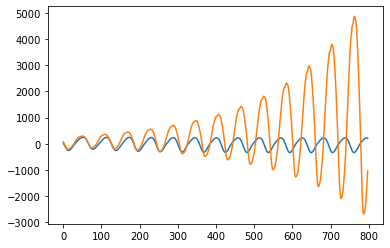

In [8]:
    
fig, ax = plt.subplots()    
ax.plot(train_data[2:800,0])
ax.plot(estimated_trajectory[2:800,0])
print(estimated_trajectory.shape)
    
#print(estimated_trajectory[0,:])
#print(train_data[0,:])
#print(estimated_trajectory[1,:])


In [ ]:

sd_upd = np.r_[sample_data, estimated_trajectory[0:100,:]]
td_upd = np.r_[train_data, train_data[0:100,:]]



es = EarlyStopping(monitor='mse', min_delta = 0, patience = 100, mode='min',verbose=1, restore_best_weights = 1)

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])
model.fit(sd_upd, td_upd, epochs=500, callbacks=[es])

es = EarlyStopping(monitor='mse', min_delta = 0, patience = 100, mode='min',verbose=1, restore_best_weights = 1)

model.compile(optimizer='adadelta',
              loss='mse',
              metrics=['mae', 'mse'])
model.fit(sd_upd, td_upd, epochs=200, callbacks=[es])


In [ ]:
#model.fit(x30_sample_grid, x30_train_values, epochs=10000, callbacks=[es])
# use the ROM to time-step given the first reduced coordinate representation
current_estimate = x170_sample_grid[0,:]
estimated_trajectory = 0*x170_sample_grid
estimated_trajectory[0,:] = current_estimate
#print(current_estimate)
#print(x30_sample_grid.shape)
#print(x30_sample_grid[0:1,:])
for i in range(0,x170_sample_grid.shape[0]-1):
    print(estimated_trajectory[i:i+1,:])
    next_estimate = model.predict(estimated_trajectory[i:i+1,:])
    print(next_estimate)
    estimated_trajectory[i+1,:-1] = next_estimate
#    estimated_trajectory[i+1,:-1] = x130_train_values[i-1,:]
    estimated_trajectory[i+1,-1] = 170
#    print(i)

In [ ]:
    
fig, ax = plt.subplots()    
ax.plot(train_data[2:800,0])
ax.plot(estimated_trajectory[2:800,0])
print(estimated_trajectory.shape)
    

In [ ]:
# use the ROM to time-step given the first reduced coordinate representation
current_estimate = x30_sample_grid[1000,:]
estimated_trajectory = 0*x30_sample_grid
estimated_trajectory[0,:] = current_estimate
#print(current_estimate)
#print(x30_sample_grid.shape)
#print(x30_sample_grid[0:1,:])
for i in range(0,x30_sample_grid.shape[0] - 1):
    next_estimate = model.predict(estimated_trajectory[i:i+1,:])
    estimated_trajectory[i+1,:-1] = next_estimate
    estimated_trajectory[i+1,-1] = 170
#    print(i)
    
    
    

In [ ]:
fig, ax = plt.subplots()    
ax.plot(x30_sample_grid[1000:1900,0])
ax.plot(estimated_trajectory[0:2000,0])
    

In [ ]:
#for i in range(0,x30_sample_grid.shape[0]):
#    next_estimate = model.predict(estimated_trajectory[i:i+1,:])
#    estimated_trajectory[i+1,:-1] = next_estimate
#    print(i)
    
#fig, ax = plt.subplots()    
#ax.plot(x30[:,0])
#ax.plot(estimated_trajectory[:,0])

In [ ]:
#fig, ax = plt.subplots()    
#ax.plot(x30_sample_grid[1000:1300,0])
#ax.plot(estimated_trajectory[0:300,0])


In [ ]:
np.argmax(train_values, axis = 1)

In [ ]:
np.argmax(pred_sg, axis=1) - np.argmax(train_values, axis = 1)

In [ ]:
f_fine_sample_grid = open('fine_sample_grid.txt', 'r')
fine_sample_grid = np.loadtxt(f_fine_sample_grid)
print(fine_sample_grid.shape)
print(fine_sample_grid)

In [ ]:
pred_fsg = model.predict(fine_sample_grid)
np.set_printoptions(threshold=np.inf)
print(pred_fsg.shape)
np.savetxt('pred_fsg.txt', pred_fsg)
#np.argmax(pred_fsg, axis=1)

In [ ]:
#f_combination_optimal_c = open('combination_optimal_c.txt', 'r')
#combination_optimal_c = np.loadtxt(f_combination_optimal_c)
#print(combination_optimal_c)
#print(sample_grid.shape)
#print(train_values.shape)
#print(combination_optimal_c.shape)
#detailed_train_values = combination_optimal_c.reshape(1640)
#print(detailed_train_values.shape)

In [ ]:
#model_2 = keras.Sequential([
#    keras.layers.Dense(2, activation='relu'),
#    keras.layers.Dense(1024, activation='relu'),
#    keras.layers.Dense(1024, activation='relu'),
#    keras.layers.Dense(8, activation='softmax')
#])
#model_2.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])
#model_2.fit(fine_sample_grid, detailed_train_values, epochs=500)

In [ ]:
#pred_mod2 = model_2.predict(fine_sample_grid)
#save_pred_mod2_fsg = np.argmax(pred_mod2, axis=1)
#np.savetxt('save_pred_mod2_fsg.txt', save_pred_mod2_fsg)

In [ ]:
pred_mod1 = np.argmax(pred_fsg, axis=1)
#np.savetxt('smart_save_pred_mod1_fsg.txt', pred_mod1)